<a href="https://colab.research.google.com/github/naaz-git/ml_flow/blob/master/mlflow_techpaperExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outcomes of Descriptive Modeling
By conducting this analysis, we can answer questions like:

What are the common characteristics of patients who no-show?
How do appointment types and times affect no-shows?
What demographics (e.g., age, race) are more associated with cancellations?

section 1

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import gc

import warnings
warnings.filterwarnings("ignore")

In [ ]:
DATA_FILE_NAME = '/content/drive/MyDrive/Colab Notebooks/AppointNoShow/Appointment Cancellation Data Explanation - Uncleaned.xlsx'
DATA_SHEET_NAME = 'Raw Data'

In [ ]:
df = pd.read_excel(DATA_FILE_NAME, sheet_name=DATA_SHEET_NAME)

In [ ]:
df.shape

(38610, 18)

In [ ]:
df.tail(5)

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
38605,456230,10/03/2019,Thursday,NEW PATIENT 30,1,1,1,White,Not Hispanic or Latino,English,55,M,UNKNOWN,N,N,N,Y,Y
38606,458490,10/23/2019,Wednesday,INJECTION,1,0,0,Other Race,Not Hispanic or Latino,Spanish,13,M,NaN,NaN,NaN,NaN,Y,Y
38607,458602,10/01/2019,Tuesday,PT FOLLOW UP 30,1,1,1,Black,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y
38608,458602,10/08/2019,Tuesday,PT FOLLOW UP 30,1,1,0,Black,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y
38609,458602,10/11/2019,Friday,PT FOLLOW UP 30,1,1,1,Black,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y


**EDA 1.1 (A)**

In [ ]:
# 1. Summary Statistics
print(df.describe())  # For numeric data
print(df.describe(include = ['object']))  # For categorcal data

           patientid  scheduled.slots  cancelled.slots  patient.noshow  \
count   38610.000000     38610.000000     38610.000000    38610.000000   
mean   388854.922481         0.935457         0.441906        0.219917   
std     48930.251465         0.308275         0.530218        0.416938   
min    299758.000000         0.000000         0.000000        0.000000   
25%    345072.000000         1.000000         0.000000        0.000000   
50%    388413.500000         1.000000         0.000000        0.000000   
75%    437654.000000         1.000000         1.000000        0.000000   
max    458602.000000         4.000000         4.000000        2.000000   

        patient.age  
count  38610.000000  
mean      40.340611  
std       22.879251  
min        0.000000  
25%       21.000000  
50%       42.000000  
75%       59.000000  
max      100.000000  
          apptdate    apptday      appttype   race  \
count        38610      38610         38610  38186   
unique          60         

**EDA 1.1 (B)**

In [ ]:
df['patient.noshow'] = df['patient.noshow'].replace(2, 1)

missed_percentage = (df['patient.noshow'].sum() / len(df)) * 100
print(f"Missed Appointment Percentage: {missed_percentage:.2f}%")


Missed Appointment Percentage: 21.88%


**EDA 1.1 (C)**

In [ ]:
df.isnull().sum()  # Check for any missing values

,0
patientid,0
apptdate,0
apptday,0
appttype,0
scheduled.slots,0
cancelled.slots,0
patient.noshow,0
race,424
ethnicity,326
patient.lang,309


In [ ]:
# Fill missing values for categorical columns with 'Unknown'
df['race'].fillna('UNKNOWN', inplace=True)
df['ethnicity'].fillna('UNKNOWN', inplace=True)
df['patient.lang'].fillna('UNKNOWN', inplace=True)
df['patient.marital.status'].fillna('UNKNOWN', inplace=True)
df['homelessstatus'].fillna('UNKNOWN', inplace=True)
df['pblchouspat'].fillna('UNKNOWN', inplace=True)
df['vetstatus'].fillna('UNKNOWN', inplace=True)
df['ptnt.cnsnt.t.cll.ysn'].fillna('N', inplace=True)
df['ptnt.cnsnt.t.txt.ysn'].fillna('N', inplace=True)

**EDA 1.1(D)**

In [ ]:
# Calculate demographics percentages
demographics = {}

# Age group distribution
demographics['Age Distribution'] = df['patient.age'].value_counts(normalize=True) * 100

# Gender distribution
demographics['Gender Distribution'] = df['patientsex'].value_counts(normalize=True) * 100

# Race and Ethnicity
demographics['Race Distribution'] = df['race'].value_counts(normalize=True) * 100
demographics['Ethnicity Distribution'] = df['ethnicity'].value_counts(normalize=True) * 100

# Language
demographics['Language Distribution'] = df['patient.lang'].value_counts(normalize=True) * 100

# Marital Status
demographics['Marital Status'] = df['patient.marital.status'].value_counts(normalize=True) * 100

# Social Factors
demographics['Homeless Status'] = df['homelessstatus'].value_counts(normalize=True) * 100
demographics['Public Housing'] = df['pblchouspat'].value_counts(normalize=True) * 100
demographics['Veteran Status'] = df['vetstatus'].value_counts(normalize=True) * 100

# Patient Consent Preferences
demographics['Consent to Call'] = df['ptnt.cnsnt.t.cll.ysn'].value_counts(normalize=True) * 100
demographics['Consent to Text'] = df['ptnt.cnsnt.t.txt.ysn'].value_counts(normalize=True) * 100

# Print demographics
for key, value in demographics.items():
    print(f"\n{key}:\n{value}")



Age Distribution:
patient.age
1      2.092722
59     1.916602
50     1.885522
57     1.823362
58     1.815592
         ...   
93     0.018130
94     0.015540
95     0.010360
97     0.002590
100    0.002590
Name: proportion, Length: 98, dtype: float64

Gender Distribution:
patientsex
F    69.365449
M    30.634551
Name: proportion, dtype: float64

Race Distribution:
race
White                                        27.187257
Other Race                                   27.148407
Black                                        27.135457
Patient Declined                              6.954157
Black or African American                     6.495726
Dominican                                     2.481222
UNKNOWN                                       1.098161
American Indian or Alaska Native              0.795131
Asian                                         0.455840
Asian Indian                                  0.093240
Other Pacific Islander                        0.080290
Native Hawaiian or Oth

Original Dataset has 38610 patient records and 18 features\


EDA 2.1(a)

In [ ]:
# Count unique patients
total_patients = df["patientid"].nunique()
print(f"Total unique patients: {total_patients}")

Total unique patients: 13064


EDA 2.1(b)

In [ ]:
# Convert 'apptdate' to datetime format
df["apptdate"] = pd.to_datetime(df["apptdate"], errors="coerce")

# Find the earliest and latest appointment dates
start_date = df["apptdate"].min()
end_date = df["apptdate"].max()

print(f"Appointments are scheduled from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Appointments are scheduled from 2019-10-01 to 2019-11-30


EDA 2.1(c)

In [ ]:
# Find duplicate patients and their number of appointments
duplicate_patients = df.groupby("patientid").size().reset_index(name="appointment_count")


# Filter patients with more than one appointment
duplicate_patients = duplicate_patients[duplicate_patients["appointment_count"] > 1]

# Print summary
print(f"Number of duplicate patients (patients with multiple appointments): {duplicate_patients.shape[0]}\n")
print(duplicate_patients.head(10))

Number of duplicate patients (patients with multiple appointments): 7911

    patientid  appointment_count
0      299758                  2
1      299770                  2
4      299796                  7
8      299865                  3
10     299893                  2
12     299942                  3
13     299960                  2
16     299981                  3
18     300100                  8
19     300102                  2


In the given dataset, this practice scheduled 13,064 unique patients over 38,610 visits. Among them, 7,911 patients had multiple appointments

Potential Data Merging: Some categories like "Black" and "Black or African American" may represent the same group and could be merged for consistency.

In [ ]:
# Merge 'Black' category with 'Other black Race' (for example)
#df['race'] = df['race'].replace({'Black': 'Black or AA', 'Black or African American': 'Black or AA'})
df['race'] = df['race'].replace({'Black': 'Black or AA', 'Black or African American': 'Black or AA','African American' : 'Black or AA'})

In [ ]:
df.tail(5)

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
38605,456230,2019-10-03,Thursday,NEW PATIENT 30,1,1,1,White,Not Hispanic or Latino,English,55,M,UNKNOWN,N,N,N,Y,Y
38606,458490,2019-10-23,Wednesday,INJECTION,1,0,0,Other Race,Not Hispanic or Latino,Spanish,13,M,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Y,Y
38607,458602,2019-10-01,Tuesday,PT FOLLOW UP 30,1,1,1,Black or AA,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y
38608,458602,2019-10-08,Tuesday,PT FOLLOW UP 30,1,1,0,Black or AA,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y
38609,458602,2019-10-11,Friday,PT FOLLOW UP 30,1,1,1,Black or AA,Hispanic or Latino/Spanish,Spanish,57,F,SINGLE,N,N,N,Y,Y


**EDA 2.1 (D)**


Frequency counts for appttype:
                            Count  Percentage
appttype                                     
FOLLOW UP 20                 8207       21.26
PT FOLLOW UP 30              5294       13.71
FOLLOW UP 10                 4795       12.42
NEW PATIENT 30               2833        7.34
BH FU/INITIAL LCSW           2401        6.22
FOLLOW UP 15                 1877        4.86
OT FOLLOW UP                 1778        4.61
WELL CHILD EXAM 20           1556        4.03
LAB WORK                     1535        3.98
ANNUAL EXAM                   936        2.42
INJECTION                     671        1.74
ESTABLISHED OB                599        1.55
PSYCHIATRY VISIT              576        1.49
PT INITIAL EVAL               531        1.38
HIV SCREENING                 522        1.35
ANNUAL GYN                    514        1.33
ANNUAL GYN 15                 413        1.07
SICK VISIT                    405        1.05
WELL CHILD PEDS RESIDENT      355        0.92
PT

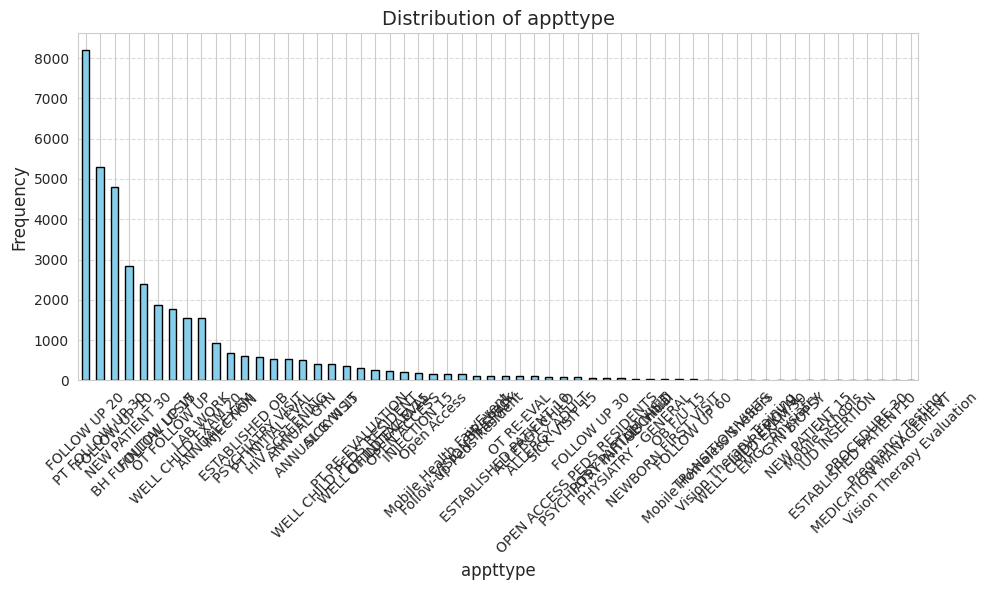


Frequency counts for race:
                                           Count  Percentage
race                                                        
Black or AA                                12987       33.64
White                                      10497       27.19
Other Race                                 10482       27.15
Patient Declined                            2685        6.95
Dominican                                    958        2.48
UNKNOWN                                      424        1.10
American Indian or Alaska Native             307        0.80
Asian                                        176        0.46
Asian Indian                                  36        0.09
Other Pacific Islander                        31        0.08
Native Hawaiian or Other Pacific Islander     11        0.03
Jamaican                                       5        0.01
Spanish American Indian                        3        0.01
American Indian                                3        0

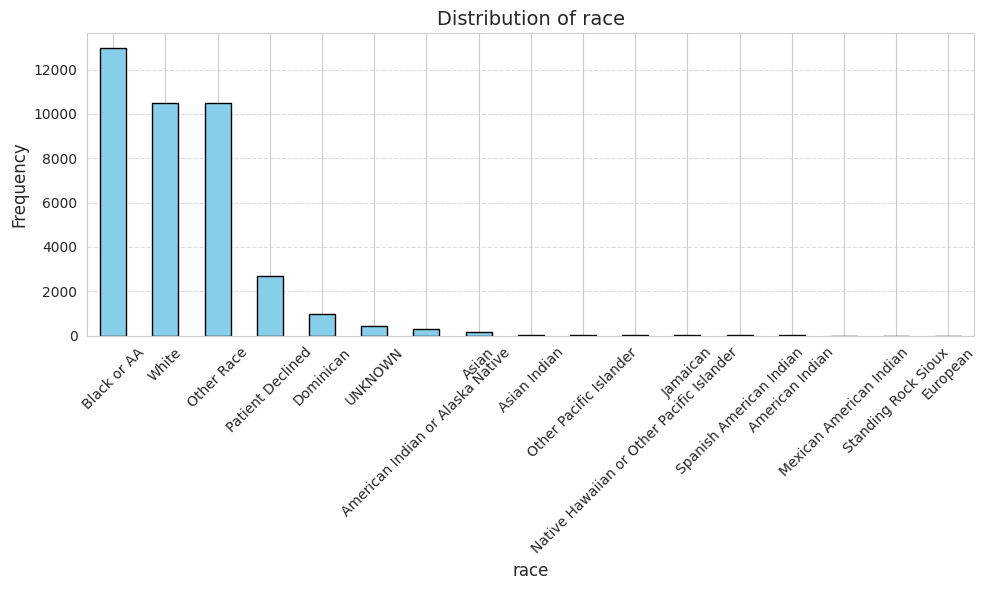


Frequency counts for ethnicity:
                              Count  Percentage
ethnicity                                      
Hispanic or Latino/Spanish    24700       63.97
Not Hispanic or Latino         9874       25.57
Dominican                      1569        4.06
Patient Declined               1048        2.71
Latin American/Latin, Latino    402        1.04
Puerto Rican                    376        0.97
UNKNOWN                         326        0.84
Mexican                         159        0.41
South American                   89        0.23
Central American                 50        0.13
Cuban                             8        0.02
Ecuadorian                        5        0.01
Honduran                          2        0.01
Spaniard                          2        0.01


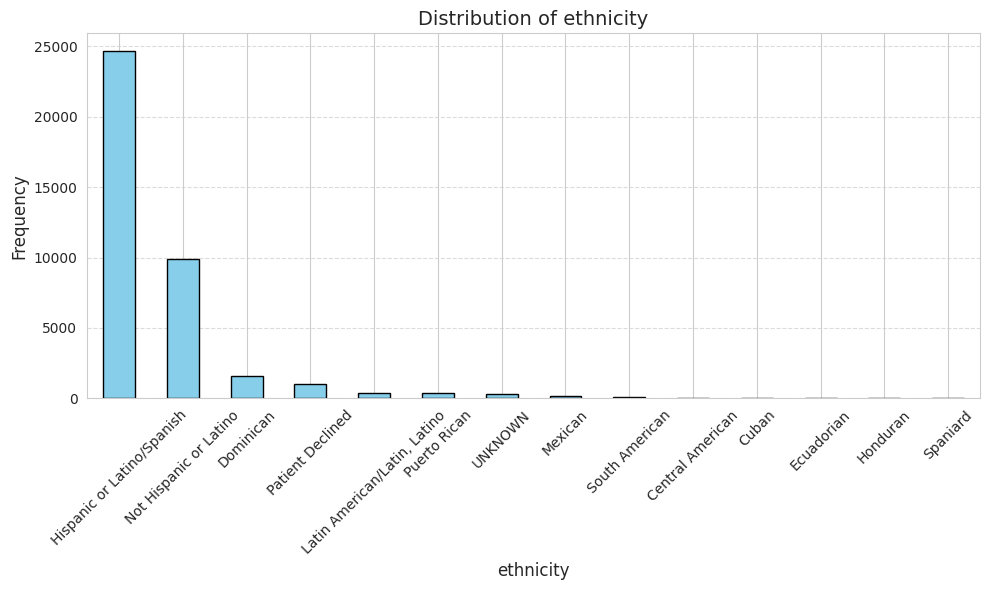

In [ ]:
# Categorical columns to analyze
categorical_columns = ["appttype", "race", "ethnicity"]

# Analyze frequency counts and percentages
for column in categorical_columns:
    # Calculate individual frequency counts
    counts = df[column].value_counts()
    # Calculate percentage distribution and multiply by 100 for percentages
    percentages = df[column].value_counts(normalize=True) * 100
    # Combine into a single DataFrame
    freq_df = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)  # rounding to 2 decimal places
    })

    # Display the results
    print(f"\nFrequency counts for {column}:")
    print(freq_df)

    # Plot frequency counts
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


EDA 2.1(d) - Patient Demographics

**Lets check all details on Uniquw patients**

In [ ]:
# Convert patientid to unique patient count
unique_patients = df.drop_duplicates(subset=['patientid'])

# Count total unique patients
total_unique_patients = unique_patients.shape[0]
print(f'{total_unique_patients=}')

total_unique_patients=13064


In [ ]:
unique_patients.head()

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
2,299770,2019-10-30,Wednesday,PT INITIAL EVAL,0,0,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
4,299783,2019-10-11,Friday,FOLLOW UP 30,1,0,0,Black or AA,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N
5,299787,2019-11-04,Monday,FOLLOW UP 20,1,0,0,Black or AA,Not Hispanic or Latino,English,65,M,SINGLE,N,N,N,Y,Y
6,299796,2019-10-02,Wednesday,PT RE-EVALUATION,0,0,0,Black or AA,Not Hispanic or Latino,English,41,M,MARRIED,N,N,N,N,Y


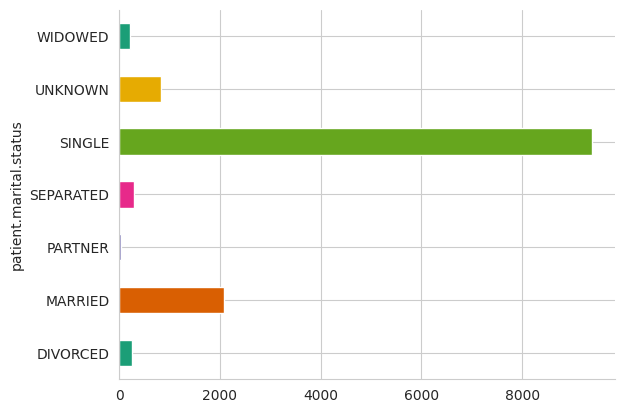

In [ ]:
# @title patient.marital.status

unique_patients.groupby('patient.marital.status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

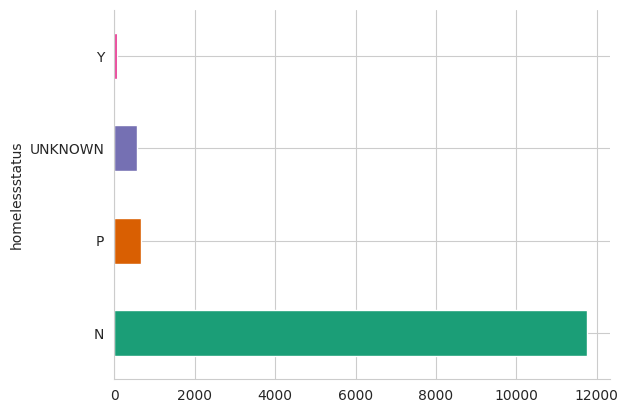

In [ ]:
# @title homelessstatus
#unique_patients
from matplotlib import pyplot as plt
import seaborn as sns
unique_patients.groupby('homelessstatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

EDA 2.1(e)

In [ ]:
# Count unique patients by race
race_counts = unique_patients['race'].value_counts(normalize=True) * 100
print(race_counts)

race
Black or AA                                  32.195346
Other Race                                   30.228108
White                                        23.423148
Patient Declined                              7.731170
UNKNOWN                                       2.663809
Dominican                                     2.265769
American Indian or Alaska Native              0.719535
Asian                                         0.528169
Other Pacific Islander                        0.107165
Asian Indian                                  0.053582
Native Hawaiian or Other Pacific Islander     0.038273
Standing Rock Sioux                           0.007655
European                                      0.007655
Jamaican                                      0.007655
Mexican American Indian                       0.007655
Spanish American Indian                       0.007655
American Indian                               0.007655
Name: proportion, dtype: float64


In above table, we can see there is veyr less amount of data for certain categoeies, so we better as well drop them as otherwise that will throw our analysis in terms pf percentage

To drop patients belonging to races with very small percentages, we can filter out those races that fall below a certain threshold.

In [ ]:
# Set a threshold for minimum percentage (e.g., i am setting 0.5%)
threshold = 0.5

# Get races that have more than the threshold percentage
filtered_race_counts = race_counts[race_counts >= threshold]

In [ ]:
# Count unique patients by ethnicity
ethnicity_counts = unique_patients['ethnicity'].value_counts(normalize=True) * 100
print(ethnicity_counts)

ethnicity
Hispanic or Latino/Spanish      62.905695
Not Hispanic or Latino          26.469688
Dominican                        3.207287
Patient Declined                 2.908757
UNKNOWN                          2.013166
Latin American/Latin, Latino     1.010410
Puerto Rican                     0.711880
Mexican                          0.436314
South American                   0.176056
Central American                 0.099510
Honduran                         0.015309
Cuban                            0.015309
Spaniard                         0.015309
Ecuadorian                       0.015309
Name: proportion, dtype: float64


In [ ]:
# Set a threshold for minimum percentage (e.g., 1%)
threshold = 0.5

# Get ethnicity counts with the same threshold filtering
ethnicity_counts = unique_patients['ethnicity'].value_counts(normalize=True) * 100

# Filter ethnicity counts based on the threshold
filtered_ethnicity_counts = ethnicity_counts[ethnicity_counts >= threshold]

# Filter the unique_patients DataFrame to only keep patients with races and ethnicities in the filtered counts
filtered_patients = unique_patients[unique_patients['race'].isin(filtered_race_counts.index) &
                                    unique_patients['ethnicity'].isin(filtered_ethnicity_counts.index)]

# Print the updated race and ethnicity counts
filtered_race_counts = filtered_patients['race'].value_counts(normalize=True) * 100
filtered_ethnicity_counts = filtered_patients['ethnicity'].value_counts(normalize=True) * 100

print("Filtered Race Counts:")
print(filtered_race_counts)

print("Filtered Ethnicity Counts:")
print(filtered_ethnicity_counts)


Filtered Race Counts:
race
Black or AA                         32.258563
Other Race                          30.286863
White                               23.521225
Patient Declined                     7.716694
UNKNOWN                              2.690791
Dominican                            2.288719
American Indian or Alaska Native     0.703626
Asian                                0.533519
Name: proportion, dtype: float64
Filtered Ethnicity Counts:
ethnicity
Hispanic or Latino/Spanish      63.426892
Not Hispanic or Latino          26.660481
Dominican                        3.232042
Patient Declined                 2.938220
UNKNOWN                          2.033558
Latin American/Latin, Latino     1.005181
Puerto Rican                     0.703626
Name: proportion, dtype: float64


We will use filtered_patients further

**EDA 2.1 (F)**

No SHow rate

In [ ]:
# Now count total appointments and no-show appointments by race
filtered_race_noshow_counts = filtered_patients.groupby('race').agg(
    total_appointments=('patientid', 'count'),
    no_show_appointments=('patient.noshow', 'sum')
).reset_index()

# Calculate no-show rate percentage
filtered_race_noshow_counts['no_show_rate'] = (filtered_race_noshow_counts['no_show_appointments'] / filtered_race_noshow_counts['total_appointments']) * 100

# Sort by no_show_appointments in descending order
filtered_race_noshow_counts_sorted = filtered_race_noshow_counts.sort_values(by='no_show_appointments', ascending=False)

# Display the result
print(filtered_race_noshow_counts_sorted)

                               race  total_appointments  no_show_appointments  \
2                       Black or AA                4172                  1016   
4                        Other Race                3917                   861   
7                             White                3042                   645   
5                  Patient Declined                 998                   245   
6                           UNKNOWN                 348                   241   
3                         Dominican                 296                    56   
0  American Indian or Alaska Native                  91                    17   
1                             Asian                  69                     8   

   no_show_rate  
2     24.352828  
4     21.981108  
7     21.203156  
5     24.549098  
6     69.252874  
3     18.918919  
0     18.681319  
1     11.594203  


In [ ]:
# Filter the original DataFrame (df) to include only the filtered races and ethnicities
filtered_df = df[df['race'].isin(filtered_race_counts.index) &
                 df['ethnicity'].isin(filtered_ethnicity_counts.index)]

In [ ]:
def analyze_no_show_by_column(df, column_name, filtered_column_values):
    """
    Analyzes the total appointments and no-show appointments by a given column (e.g., 'race', 'ethnicity').

    Parameters:
    - df: The DataFrame containing the full patient data.
    - column_name: The column name to group by (e.g., 'race', 'ethnicity').
    - filtered_column_values: A list or index of values for filtering the data (e.g., filtered_race_counts.index).

    Returns:
    - A sorted DataFrame with total appointments, no-show appointments, and no-show rates.
    """
    # Filter the DataFrame based on the provided column values
    filtered_df = df[df[column_name].isin(filtered_column_values)]

    # Count total appointments and no-show appointments by the specified column
    column_noshow_counts = filtered_df.groupby(column_name).agg(
        total_appointments=('patientid', 'count'),
        no_show_appointments=('patient.noshow', 'sum')
    ).reset_index()

    # Calculate the no-show rate percentage
    column_noshow_counts['no_show_rate'] = (column_noshow_counts['no_show_appointments'] / column_noshow_counts['total_appointments']) * 100

    # Sort by no_show_appointments in descending order
    column_noshow_counts_sorted = column_noshow_counts.sort_values(by='no_show_appointments', ascending=False)

    return column_noshow_counts_sorted



**EDA 2.2 (**A**)**

In [ ]:
# NO SHOW RATE For 'race'
filtered_race_values = filtered_race_counts.index  # Assumed to be the filtered race values from earlier
race_noshow_results = analyze_no_show_by_column(df, 'race', filtered_race_values)
print(race_noshow_results)

                               race  total_appointments  no_show_appointments  \
2                       Black or AA               12987                  3053   
7                             White               10497                  2167   
4                        Other Race               10482                  2099   
5                  Patient Declined                2685                   554   
6                           UNKNOWN                 424                   289   
3                         Dominican                 958                   187   
0  American Indian or Alaska Native                 307                    51   
1                             Asian                 176                    21   

   no_show_rate  
2     23.508124  
7     20.643994  
4     20.024804  
5     20.633147  
6     68.160377  
3     19.519833  
0     16.612378  
1     11.931818  


EDA 2.2 (B)

In [ ]:
# for 'ethnicity'
filtered_ethnicity_values = filtered_ethnicity_counts.index  # Assumed to be the filtered ethnicity values from earlier
ethnicity_noshow_results = analyze_no_show_by_column(df, 'ethnicity', filtered_ethnicity_values)
print(ethnicity_noshow_results)

                      ethnicity  total_appointments  no_show_appointments  \
1    Hispanic or Latino/Spanish               24700                  5186   
3        Not Hispanic or Latino                9874                  2256   
0                     Dominican                1569                   333   
4              Patient Declined                1048                   233   
6                       UNKNOWN                 326                   211   
5                  Puerto Rican                 376                    96   
2  Latin American/Latin, Latino                 402                    65   

   no_show_rate  
1     20.995951  
3     22.847883  
0     21.223709  
4     22.232824  
6     64.723926  
5     25.531915  
2     16.169154  


EDA 2.2 (C)

In [ ]:

# Count the total appointments and no-show appointments by race from the filtered data
race_noshow_counts = filtered_df.groupby('race').agg(
    total_appointments=('patientid', 'count'),
    no_show_appointments=('patient.noshow', 'sum')
).reset_index()

# Calculate no-show rate percentage
race_noshow_counts['no_show_rate'] = (race_noshow_counts['no_show_appointments'] / race_noshow_counts['total_appointments']) * 100

# Sort by no_show_appointments in descending order
race_noshow_counts_sorted = race_noshow_counts.sort_values(by='no_show_appointments', ascending=False)

# Display the result
print(race_noshow_counts_sorted)


                               race  total_appointments  no_show_appointments  \
2                       Black or AA               12888                  3028   
7                             White               10427                  2148   
4                        Other Race               10407                  2090   
5                  Patient Declined                2651                   544   
6                           UNKNOWN                 424                   289   
3                         Dominican                 958                   187   
0  American Indian or Alaska Native                 284                    49   
1                             Asian                 176                    21   

   no_show_rate  
2     23.494724  
7     20.600364  
4     20.082637  
5     20.520558  
6     68.160377  
3     19.519833  
0     17.253521  
1     11.931818  


EDA 2.2 (D)

In [ ]:
# Count the total appointments and no-show appointments by Gender from the filtered data
gender_noshow_counts = filtered_df.groupby('patientsex').agg(
    total_appointments=('patientid', 'count'),
    no_show_appointments=('patient.noshow', 'sum')
).reset_index()

# Calculate no-show rate percentage
gender_noshow_counts['no_show_rate'] = (gender_noshow_counts['no_show_appointments'] / race_noshow_counts['total_appointments']) * 100

# Sort by no_show_appointments in descending order
gender_noshow_counts_sorted = gender_noshow_counts.sort_values(by='no_show_appointments', ascending=False)

# Display the result
print(gender_noshow_counts_sorted)

  patientsex  total_appointments  no_show_appointments  no_show_rate
0          F               26531                  5796   2040.845070
1          M               11684                  2560   1454.545455


In [ ]:
filtered_df.head(1)

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y


EDA 2.2 (D)

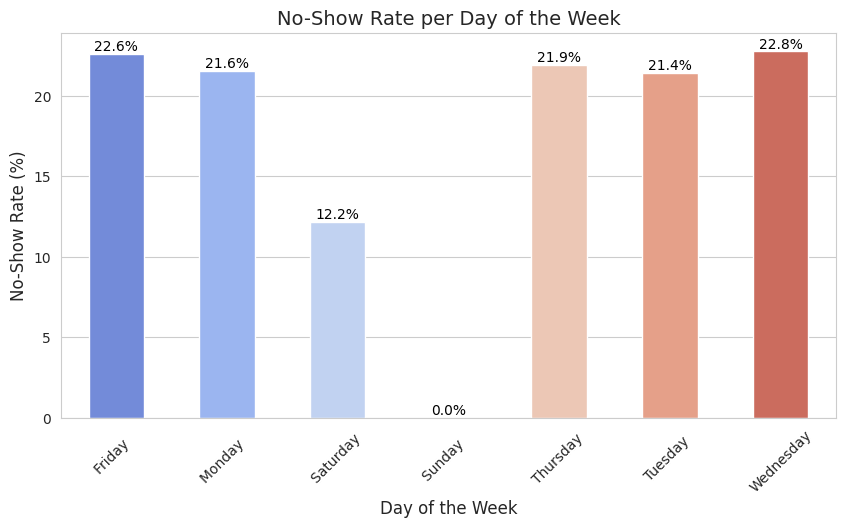

No-Show Rate per Day of the Week (%):
apptday
Friday      22.63
Monday      21.58
Saturday    12.19
Sunday       0.00
Thursday    21.92
Tuesday     21.44
Wednesday   22.78


In [ ]:

# Group by 'apptday' and calculate the no-show rate
no_show_rate = filtered_df.groupby('apptday')['patient.noshow'].mean() * 100

# Automatically get the order based on data
day_order = no_show_rate.index.tolist()

# Set the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=no_show_rate.index, y=no_show_rate.values, palette="coolwarm", width=0.5)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("No-Show Rate (%)", fontsize=12)
plt.title("No-Show Rate per Day of the Week", fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for readability

# Show the plot
plt.show()
# Print the no-show rate for each day
print("No-Show Rate per Day of the Week (%):")
print(no_show_rate.to_string(index=True, float_format="%.2f"))


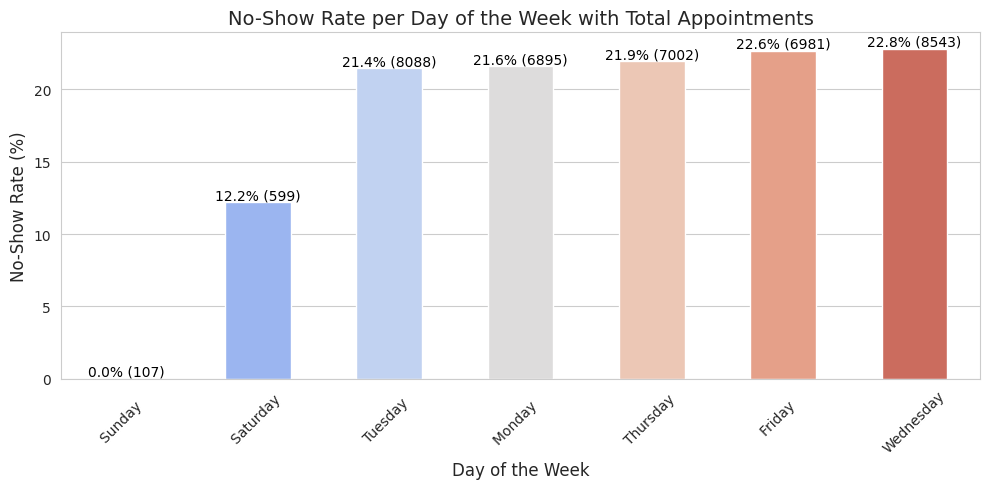

No-Show Rate per Day of the Week (%):
apptday
Sunday       0.00
Saturday    12.19
Tuesday     21.44
Monday      21.58
Thursday    21.92
Friday      22.63
Wednesday   22.78

Total Appointments per Day:
apptday
Sunday        107
Saturday      599
Tuesday      8088
Monday       6895
Thursday     7002
Friday       6981
Wednesday    8543


In [ ]:

import matplotlib.lines as mlines

# Group by 'apptday' and calculate the no-show rate and total appointments
no_show_rate = filtered_df.groupby('apptday')['patient.noshow'].mean() * 100
total_appointments = filtered_df.groupby('apptday')['patient.noshow'].count()

# Sort the series by no-show rate
no_show_rate = no_show_rate.sort_values()
total_appointments = total_appointments.loc[no_show_rate.index]

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=no_show_rate.index, y=no_show_rate.values, palette="coolwarm", width=0.5)

# Annotate each bar with both the no-show rate and total appointments
for i, day in enumerate(no_show_rate.index):
    rate = no_show_rate.loc[day]
    total = total_appointments.loc[day]
    ax.text(i, rate, f"{rate:.1f}% ({total})", ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("No-Show Rate (%)", fontsize=12)
plt.title("No-Show Rate per Day of the Week with Total Appointments", fontsize=14)
plt.xticks(rotation=45)

# Create a custom legend explaining the annotations
dummy = mlines.Line2D([], [], linestyle='none')
legend_label = "Annotations: No-Show Rate (%) and (Total Appointments)"
#ax.legend([dummy], [legend_label], loc='upper right', frameon=False, fontsize=10)

plt.tight_layout()
plt.show()

# Optionally, print the values for reference
print("No-Show Rate per Day of the Week (%):")
print(no_show_rate.to_string(index=True, float_format="%.2f"))
print("\nTotal Appointments per Day:")
print(total_appointments.to_string(index=True))


In [ ]:
appointments_per_day = filtered_df['apptday'].value_counts().reindex(filtered_df['apptday'].unique(), fill_value=0)
print("Appointments per Day:")
print(appointments_per_day)


Appointments per Day:
apptday
Tuesday      8088
Wednesday    8543
Friday       6981
Monday       6895
Thursday     7002
Saturday      599
Sunday        107
Name: count, dtype: int64


EDA 2.2 (E)

Aggregates total no-show counts: Sums the patient.noshow values for each duplicate patient.


In [ ]:
# Count total no-show occurrences per patient
duplicate_patients_no_show = df[df.duplicated(subset=['patientid'], keep=False)].groupby('patientid')['patient.noshow'].sum().reset_index()

# Rename columns for clarity
duplicate_patients_no_show.rename(columns={'patient.noshow': 'total_no_show'}, inplace=True)

# Display summary statistics
print(duplicate_patients_no_show.describe())

# View the first few records
print(duplicate_patients_no_show.head(10))


           patientid  total_no_show
count    7911.000000    7911.000000
mean   388473.951334       0.847301
std     48747.863835       1.245043
min    299758.000000       0.000000
25%    345431.500000       0.000000
50%    388464.000000       0.000000
75%    436598.500000       1.000000
max    458602.000000      14.000000
   patientid  total_no_show
0     299758              0
1     299770              0
2     299796              1
3     299865              1
4     299893              2
5     299942              1
6     299960              0
7     299981              0
8     300100              4
9     300102              1


Count: There are 7911 patients with records of no-show occurrences.
Minimum: The least number of no-show occurrences is 0, indicating that some patients did not miss any appointments.
25th Percentile: 0 represents the 25% of patients who did not miss any appointments.
Median (50th Percentile): 0, meaning half of the patients had no no-shows.
75th Percentile: At 1, it shows that three-quarters of patients had at most one no-show.
Maximum: The highest number of no-shows for a patient is 14, indicating that some patients may have missed many appointments.

HIGHER RATE OF NO SHOW

This analysis highlights the need for further investigation into factors influencing no-show behavior, as the distribution shows a concentration of patients with few or no no-shows, while a small number of patients exhibit much higher rates of no-shows.

EDA 2.3 (B)

PATIENT data aggregated: e.g.number of appointments will be added for each patient

IGNORE SCHEDULED/CANCELLED BOTH.
CONSIDER APPOINTMENT TAKEN IF PATIENT ID APPEARS IN THE CELL

Since a patient should have only one race and ethnicity, using 'first' ensures we only capture the initial value for each patient.

In [ ]:
patient_appointments = df.groupby('patientid').agg(
    total_appointments=('patientid', 'count'),
    total_no_show=('patient.noshow', 'sum'),
    age=('patient.age', 'mean'),
    race=('race', 'first'),  #
    ethnicity =('ethnicity', 'first')  #
).reset_index()

In [ ]:
# Classify patients based on no-show behavior
def categorize_no_show(row):
    if row['total_no_show'] == 0:
        return 'Always Attended'
    elif row['total_no_show'] == row['total_appointments']:
        return 'Always No-Show'
    else:
        return 'Missed At Least One'

In [ ]:
# Apply classification
patient_appointments['no_show_category'] = patient_appointments.apply(categorize_no_show, axis=1)
# Count patients in each category and calculate percentages
no_show_analysis = patient_appointments['no_show_category'].value_counts(normalize=True) * 100

# Display results
print(no_show_analysis)


no_show_category
Always Attended        56.537048
Missed At Least One    27.732701
Always No-Show         15.730251
Name: proportion, dtype: float64


The output reflects the distribution of patients based on their no-show behavior after the classification:

Always Attended (56.54%): About 56.54% of patients never missed any of their scheduled appointments. These patients have a total_no_show value of 0, meaning they attended every appointment they were scheduled for.

Missed At Least One (27.76%): Approximately 27.76% of patients missed at least one of their appointments but attended others. These patients have a total_no_show value that is less than the total number of their appointments but greater than 0.

Always No-Show (15.71%): Around 15.71% of patients missed every appointment they were scheduled for. These patients have a total_no_show value equal to their total_appointments value, meaning they didn't attend any of their appointments.

In [ ]:
patient_appointments

,patientid,total_appointments,total_no_show,age,race,ethnicity,no_show_category
0,299758,2,0,54.0,Patient Declined,Hispanic or Latino/Spanish,Always Attended
1,299770,2,0,81.0,Black or AA,Not Hispanic or Latino,Always Attended
2,299783,1,0,49.0,Black or AA,Not Hispanic or Latino,Always Attended
3,299787,1,0,65.0,Black or AA,Not Hispanic or Latino,Always Attended
4,299796,7,1,41.0,Black or AA,Not Hispanic or Latino,Missed At Least One
...,...,...,...,...,...,...,...
13059,455802,1,0,46.0,Black or AA,Dominican,Always Attended
13060,455803,1,0,64.0,Black or AA,Dominican,Always Attended
13061,456230,1,1,55.0,White,Not Hispanic or Latino,Always No-Show
13062,458490,1,0,13.0,Other Race,Not Hispanic or Latino,Always Attended


EDA 2.3 (C)

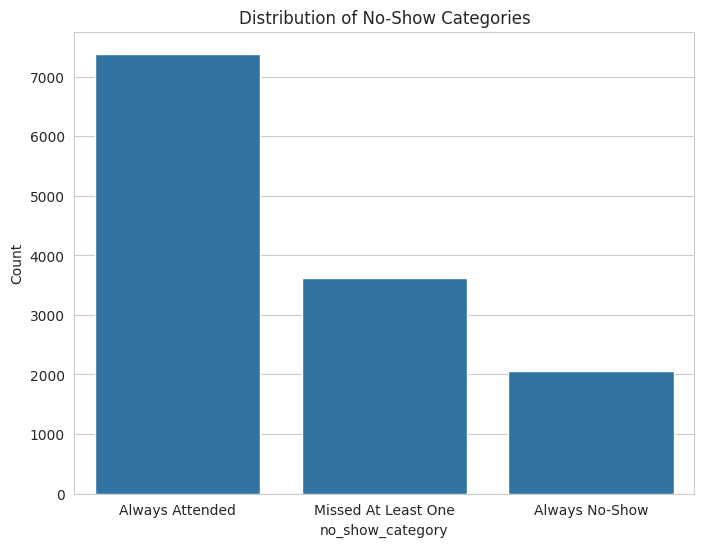

In [ ]:


# Visualize the count of no-show categories
plt.figure(figsize=(8,6))
sns.countplot(data=patient_appointments, x='no_show_category')
plt.title('Distribution of No-Show Categories')
plt.ylabel('Count')
plt.show()



13k unique patients -

1.   7.5k - Always attended,

2.   5k -  Missed at least one,

3.   3K - Always No show

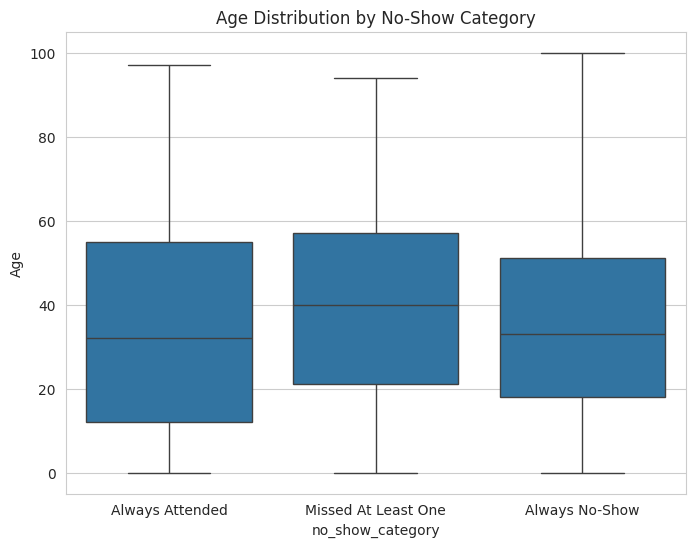

In [ ]:
# Visualize the average age for each no-show category
plt.figure(figsize=(8,6))
sns.boxplot(data=patient_appointments, x='no_show_category', y='age')
plt.title('Age Distribution by No-Show Category')
plt.ylabel('Age')
plt.show()


In [ ]:
# Proportion of no-show categories for each ethnicity
ethnicity_no_show = patient_appointments.groupby('ethnicity')['no_show_category'].value_counts(normalize=True).unstack() * 100
print(ethnicity_no_show)

# Proportion of no-show categories for each race
race_no_show = patient_appointments.groupby('race')['no_show_category'].value_counts(normalize=True).unstack() * 100
print(race_no_show)


no_show_category              Always Attended  Always No-Show  \
ethnicity                                                       
Central American                    46.153846       15.384615   
Cuban                                     NaN       50.000000   
Dominican                           58.711217        9.785203   
Ecuadorian                          50.000000             NaN   
Hispanic or Latino/Spanish          57.593088       14.614261   
Honduran                                  NaN      100.000000   
Latin American/Latin, Latino        64.393939       10.606061   
Mexican                             59.649123       12.280702   
Not Hispanic or Latino              56.015038       15.442452   
Patient Declined                    58.157895       18.157895   
Puerto Rican                        49.462366       10.752688   
South American                      52.173913       13.043478   
Spaniard                            50.000000       50.000000   
UNKNOWN                  

**EDA 2.4(A)**

 to count total appointments and no-show appointments for any given column (e.g., race, ethnicity, or any categorical variable):

In [ ]:
def drawplot(category, category_noshow_counts_sorted):
   # Plot results
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=category_noshow_counts_sorted,
        x=category,
        y="no_show_appointments",
        palette="coolwarm"
    )
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(category.capitalize())
    plt.ylabel("No-Show Appointments")
    plt.title(f"No-Show Appointments by {category.capitalize()}")
    plt.show()


In [ ]:
def count_appointments_by_category(df, category, threshold=1.0):
    # Group by the category (e.g., race) and calculate the total number of appointments and no-show appointments
    category_noshow_counts = df.groupby(category).agg(
        total_appointments=('patientid', 'count'),
        no_show_appointments=('patient.noshow', 'sum')
    ).reset_index()

    # Calculate total no-show appointments across all categories
    total_no_show_appointments = category_noshow_counts['no_show_appointments'].sum()

    # Calculate the percentage of no-show appointments relative to the total no-show appointments
    category_noshow_counts['no_show_rate'] = (category_noshow_counts['no_show_appointments'] / total_no_show_appointments) * 100

    # Filter categories with no_show_rate above the threshold
    category_noshow_counts_filtered = category_noshow_counts[category_noshow_counts['no_show_rate'] >= threshold]

    # Sort by no_show_rate in descending order
    category_noshow_counts_sorted = category_noshow_counts_filtered.sort_values(by='no_show_rate', ascending=False).reset_index(drop=True)

    # Reorder columns to match desired format: category, no_show_rate, total_appointments, no_show_appointments
    category_noshow_counts_sorted = category_noshow_counts_sorted[[category, 'no_show_rate', 'total_appointments', 'no_show_appointments']]
    drawplot(category, category_noshow_counts_sorted)
    return category_noshow_counts_sorted

EDA 2.3(B)

Analyze demographic distribution for each group




**RACE Vs NO SHOW RATE**

no_show_rate: This column indicates the percentage of no-show appointments relative to the total appointments for each day of the week. The values are expressed as percentages.


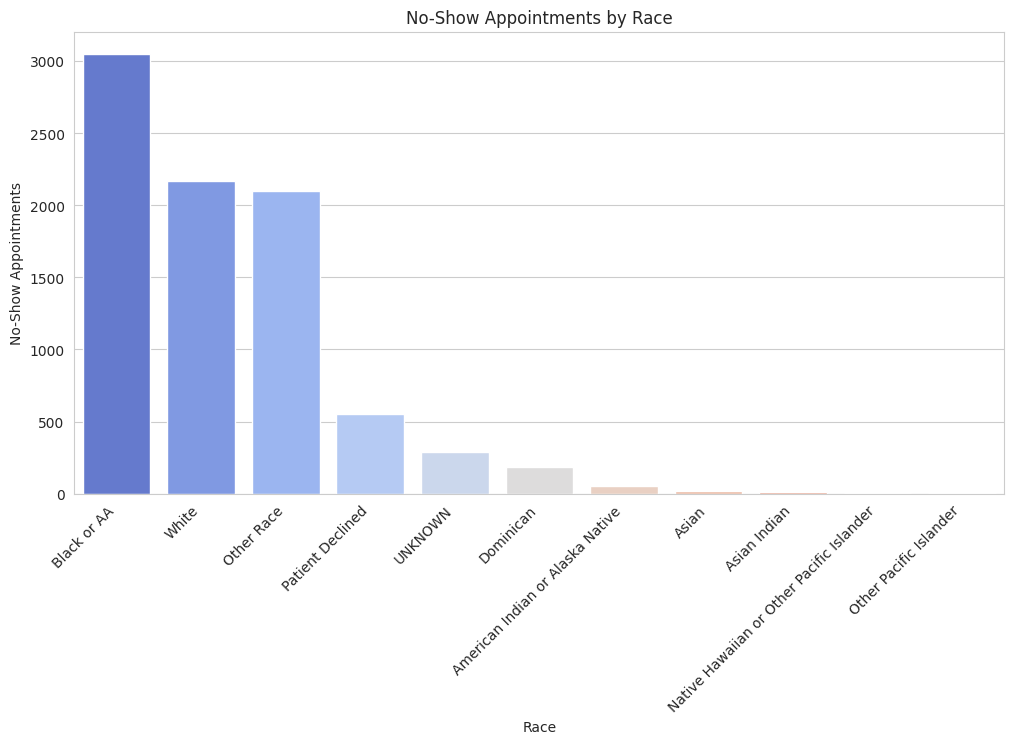

                                         race  no_show_rate  \
0                                 Black or AA     36.143009   
1                                       White     25.654078   
2                                  Other Race     24.849059   
3                            Patient Declined      6.558541   
4                                     UNKNOWN      3.421333   
5                                   Dominican      2.213804   
6            American Indian or Alaska Native      0.603765   
7                                       Asian      0.248609   
8                                Asian Indian      0.153901   
9   Native Hawaiian or Other Pacific Islander      0.059193   
10                     Other Pacific Islander      0.059193   

    total_appointments  no_show_appointments  
0                12987                  3053  
1                10497                  2167  
2                10482                  2099  
3                 2685                   554  
4       

In [ ]:
# Example usage
category_noshow_counts_sorted = count_appointments_by_category(df, 'race', threshold=0.05)

# Display the result
print(category_noshow_counts_sorted)


**Black or Arfican American have 36% no SHow rate, followed by White - 25% , Other race also account for 24% rate of no show**

RACE Observations:
Dominant Groups: The majority of patients identify as White, Black, or Other Race, with each category having over 10,000 counts.
Small Subgroups: Categories such as European (1 count), Standing Rock Sioux (2 counts), and Jamaican (5 counts) show minimal representation.
"Patient Declined": A significant number of patients (2,685) chose not to disclose their race.

EDA 2.3(C)

**ETHNICITY Vs NO SHOW RATE**

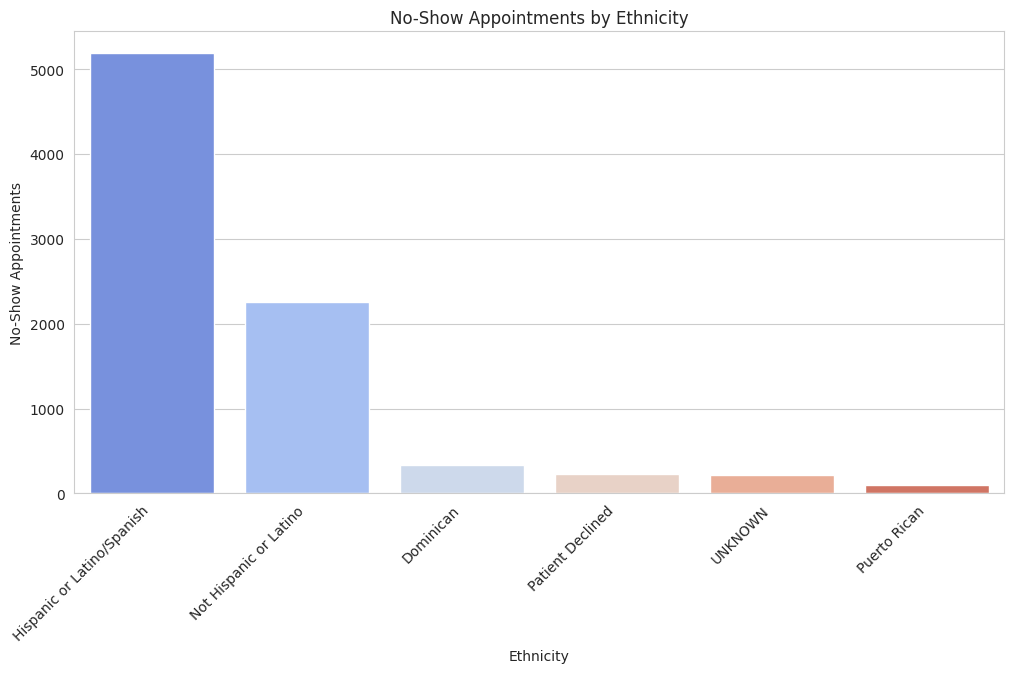

                    ethnicity  no_show_rate  total_appointments  \
0  Hispanic or Latino/Spanish     61.394578               24700   
1      Not Hispanic or Latino     26.707707                9874   
2                   Dominican      3.942228                1569   
3            Patient Declined      2.758376                1048   
4                     UNKNOWN      2.497928                 326   
5                Puerto Rican      1.136498                 376   

   no_show_appointments  
0                  5186  
1                  2256  
2                   333  
3                   233  
4                   211  
5                    96  


In [ ]:
ethnicity_noshow_counts = count_appointments_by_category(df, 'ethnicity')
print(ethnicity_noshow_counts)

ETHNICITY OBSERVATIONS:
Observations:
Dominant Ethnicity:

The majority of individuals identify as Hispanic or Latino/Spanish (24,700), making up a significant portion of the dataset.
Those identifying as Not Hispanic or Latino form the second-largest group (9,874)

EDA 2.3(D)

APPOINTMENT TYPE OBSERVATIONS:Observations:

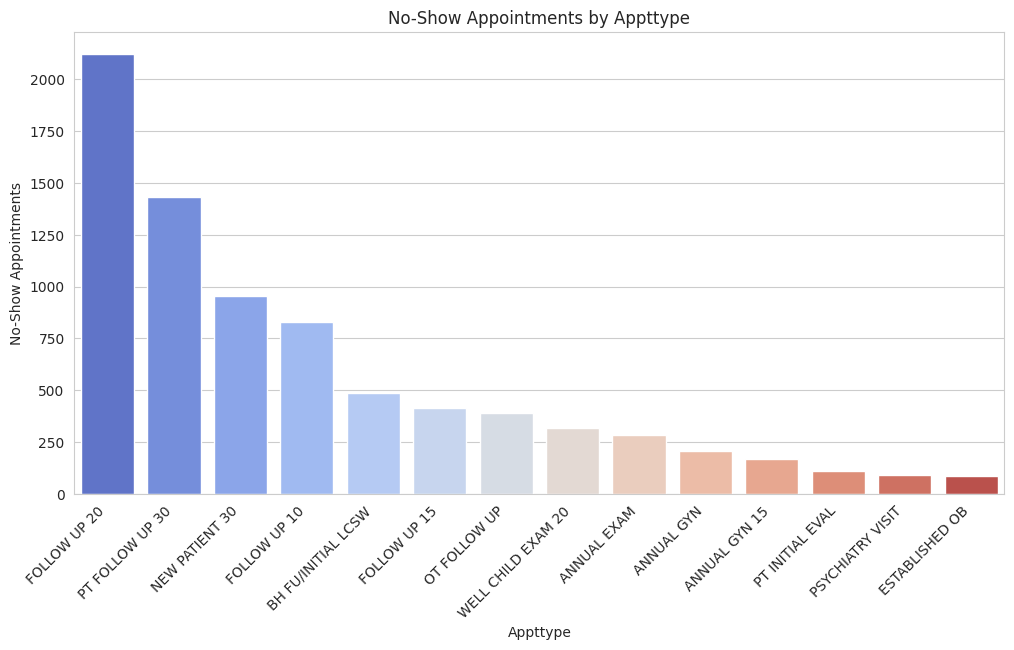

              appttype  no_show_rate  total_appointments  no_show_appointments
0         FOLLOW UP 20     25.109506                8207                  2121
1      PT FOLLOW UP 30     16.929087                5294                  1430
2       NEW PATIENT 30     11.317628                2833                   956
3         FOLLOW UP 10      9.802297                4795                   828
4   BH FU/INITIAL LCSW      5.753522                2401                   486
5         FOLLOW UP 15      4.889310                1877                   413
6         OT FOLLOW UP      4.628862                1778                   391
7   WELL CHILD EXAM 20      3.764650                1556                   318
8          ANNUAL EXAM      3.350302                 936                   283
9           ANNUAL GYN      2.438736                 514                   206
10       ANNUAL GYN 15      2.012549                 413                   170
11     PT INITIAL EVAL      1.302237                

In [ ]:
appttype_no_show = count_appointments_by_category(df, 'appttype')
print(appttype_no_show)

Most Common Appointments:

The majority of appointments are follow-ups, particularly FOLLOW UP 20 (8,207), PT FOLLOW UP 30 (5,294), and FOLLOW UP 10 (4,795).
Together, follow-up categories dominate the no -show appointmemnts, indicating patients donmt usually come for follow op treatments or ongoing care.

The appointment type FOLLOW UP 20 has the highest no-show rate at 25.03%, with 8207 total appointments and 2125 no-show appointments.

Other appointment types such as PT FOLLOW UP 30 (17.09%) and NEW PATIENT 30 (11.27%) also have significant no-show rates, suggesting that follow-up and new patient appointments have a relatively higher chance of no-shows.

Appointment types like PSYCHIATRY VISIT (1.08%) and ESTABLISHED OB (1.02%) have the lowest no-show rates, suggesting that these appointments are more likely to be attended by patients.


EDA 2.3(E)

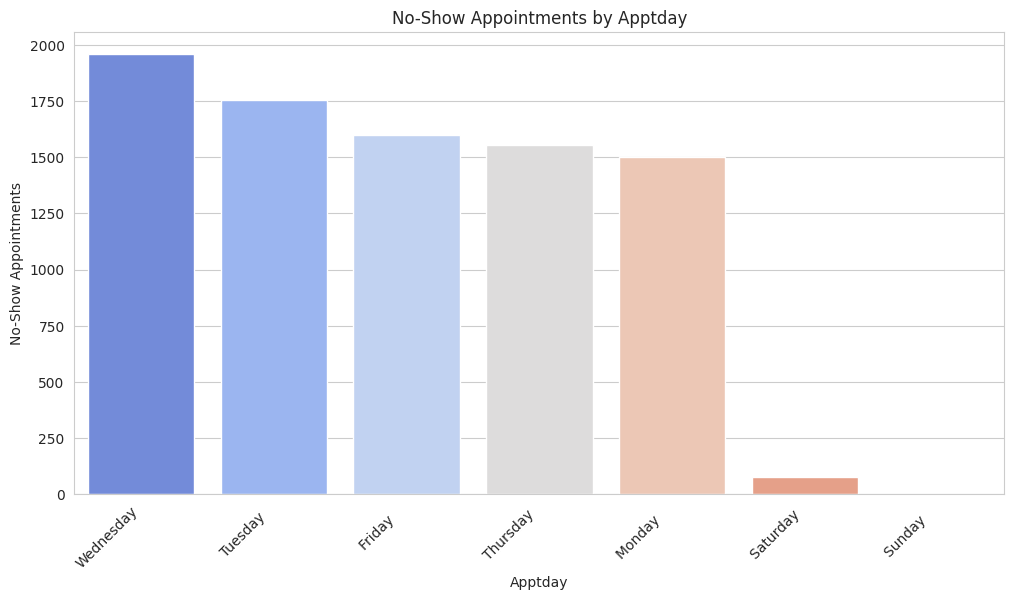

     apptday  no_show_rate  total_appointments  no_show_appointments
0  Wednesday     23.215343                8590                  1961
1  Tuesday       20.800284                8175                  1757
2  Friday        18.929798                7067                  1599
3  Thursday      18.385226                7077                  1553
4  Monday        17.769622                6978                  1501
5  Saturday       0.899728                 614                    76
6  Sunday         0.000000                 109                     0


In [ ]:
apptday_no_show = count_appointments_by_category(df, 'apptday', threshold=0)
print(apptday_no_show)

Wednesday has the highest no-show rate at 23.17%, with 8590 total appointments and 1967 no-show appointments.
Other days like Tuesday (20.85%) and Friday (18.95%) also show high no-show rates.

Lower No-Show Rates:

Sunday has no no-shows, as it has only 109 total appointments and 0 no-show appointments. This suggests that Sunday may be a less common day for appointments, or people who do schedule appointments on Sundays are more likely to show up.

EDA 2.3(F)

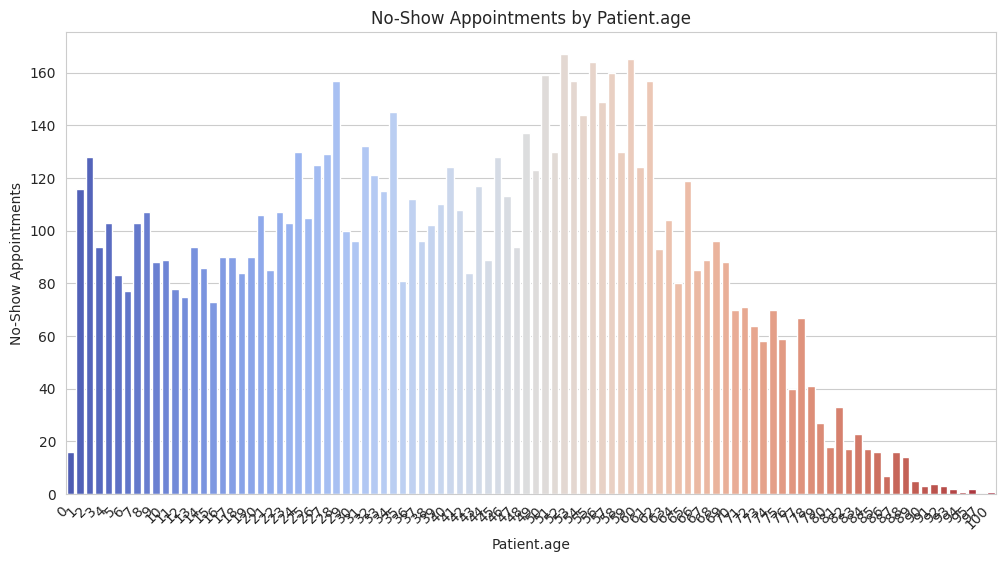

    patient.age  no_show_rate  total_appointments  no_show_appointments
0            52      1.977033                 651                   167
1            59      1.953356                 740                   165
2            55      1.941518                 647                   164
3            57      1.894164                 704                   160
4            50      1.882325                 728                   159
..          ...           ...                 ...                   ...
93           93      0.023677                   7                     2
94           95      0.023677                   4                     2
95           94      0.011839                   6                     1
96          100      0.011839                   1                     1
97           97      0.000000                   1                     0

[98 rows x 4 columns]


In [ ]:
apptday_no_show = count_appointments_by_category(df, 'patient.age', threshold=0)
print(apptday_no_show)

In [ ]:
unique_ages = df['patient.age'].unique()
print(unique_ages)


[ 54  81  49  65  41  52  70  43  14  72  40  58  60   7  15   4  32  13
  36  28  51  33  79  55  20  39  47  21  66  27  35   3  18   6  88  62
  90  61  10  34  17  56  23  26   8   9  22  71  69  37  78  63  12  45
  44  57  19  82  46  16  68  11  24  53  77  25  76  74  59  67  29  75
  50  38   2   5  73  31  48  64  42  83  86  30  80  84   1  89  87  91
  95  93  85  92  94   0  97 100]


We will create bins to easily visualize

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df['age_group'] = pd.cut(df['patient.age'], bins=bins, labels=labels, right=False)

# Create age bins
#bins = [0, 10, 20,30, 40, 50, 60, 70, 80, 90, 100]  # Adjust the bin edges based on your data
#labels = ['0-10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column for age groups
df['age_group'] = pd.cut(df['patient.age'], bins=bins, labels=labels, right=False)

# Now group by 'age_group' and calculate the no-show rate
age_group_no_show = df.groupby('age_group').agg(
    total_appointments=('patientid', 'count'),
    no_show_appointments=('patient.noshow', 'sum')
).reset_index()

# Calculate no-show rate percentage
age_group_no_show['no_show_rate'] = (age_group_no_show['no_show_appointments'] / age_group_no_show['total_appointments']) * 100

# Sort by no-show rate if you want
age_group_no_show_sorted = age_group_no_show.sort_values(by='no_show_rate', ascending=False)

# Display the result
print(age_group_no_show_sorted)


  age_group  total_appointments  no_show_appointments  no_show_rate
2     21-30                4552                  1147     25.197715
3     31-40                4626                  1110     23.994812
4     41-50                4752                  1117     23.505892
5     51-60                6724                  1525     22.679952
1     11-20                3954                   849     21.471927
6     61-70                5052                  1035     20.486936
7     71-80                2989                   567     18.969555
9       91+                  86                    16     18.604651
8     81-90                 901                   166     18.423973
0      0-10                4974                   915     18.395657


This shows a tendency for younger individuals (especially in the 21-30 age group) to have a higher no-show rate, while older individuals (such as those aged 71-80 and above) seem to show up for their appointments more consistently.

In [ ]:
# Replace 'target_column' with the name of your target variable column
target_column = 'patient.noshow'
unique_values = df[target_column].unique()

# Print the unique values
print(unique_values)

[0 1]


In [ ]:

# Calculate the correlation between age and no-show rate
correlation = df['patient.age'].corr(df['patient.noshow'])

# Display the correlation value
print(f'Correlation between Age and No-Show Rate: {correlation}')

Correlation between Age and No-Show Rate: -0.0025469774699105278


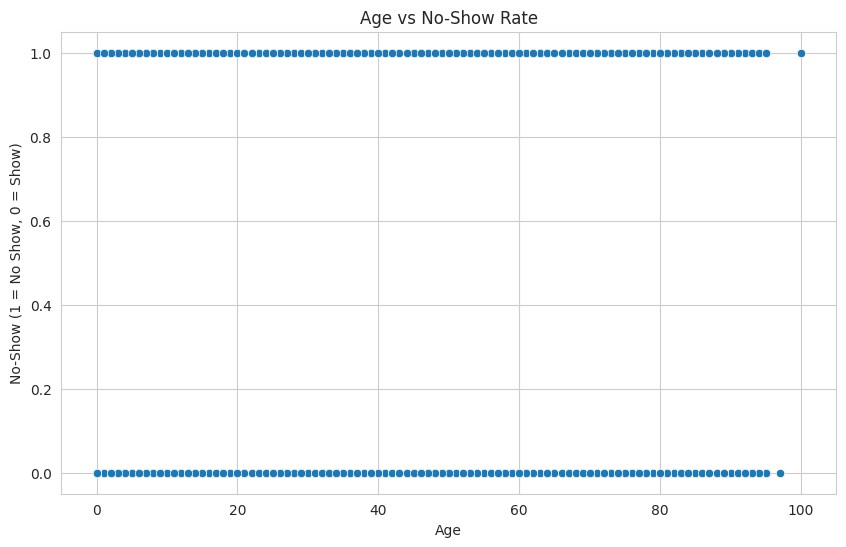

In [ ]:

# Plot a scatter plot between Age and No-Show Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='patient.age', y='patient.noshow')

plt.title('Age vs No-Show Rate')
plt.xlabel('Age')
plt.ylabel('No-Show (1 = No Show, 0 = Show)')
plt.show()


PLOT TOGETHER

In [ ]:
filtered_df.head(2)

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
1,299758,2019-11-19,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y


In [ ]:
filtered_df['patient.noshow'].unique()

array([0, 1])

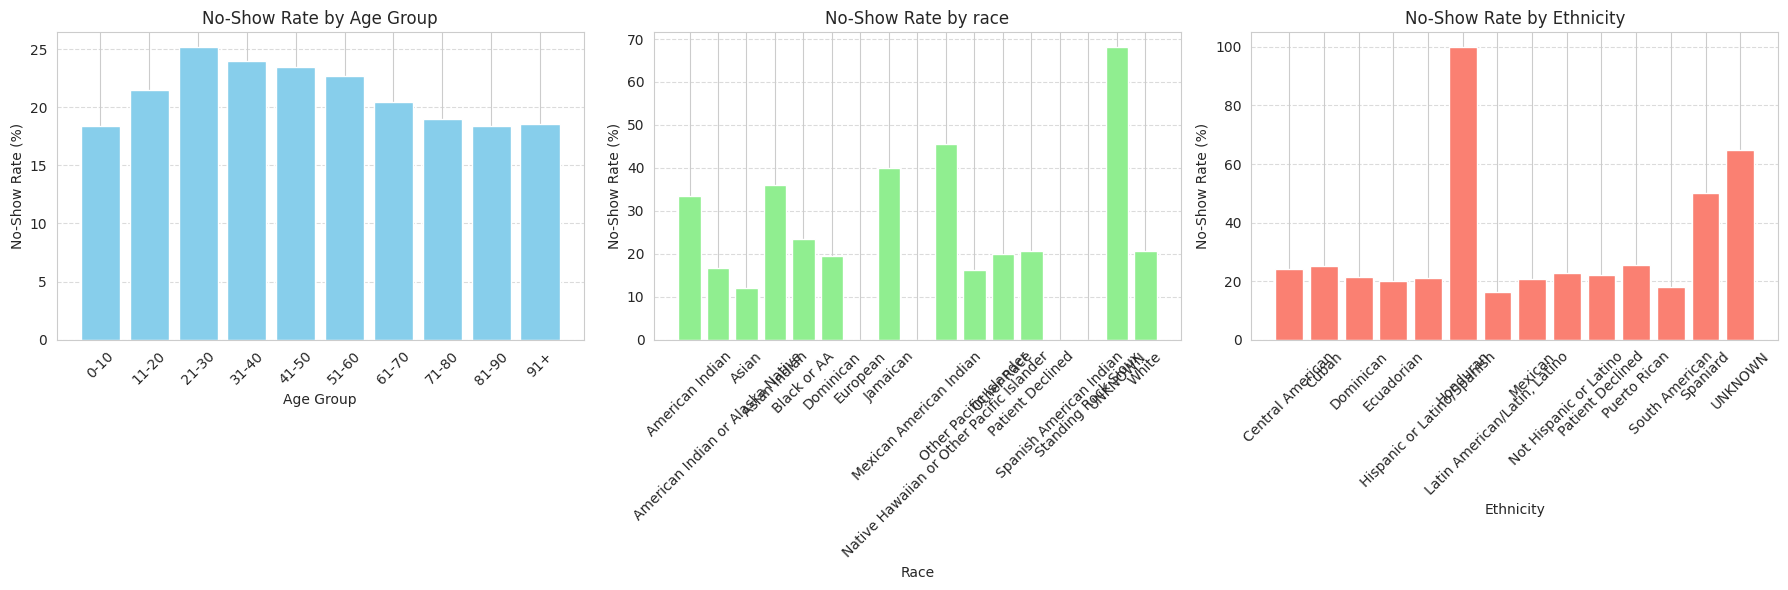

In [ ]:

# Compute no-show rate (percentage) for each feature
no_show_age = df.groupby('age_group')['patient.noshow'].mean() * 100
no_show_race = df.groupby('race')['patient.noshow'].mean() * 100
no_show_ethnicity = df.groupby('ethnicity')['patient.noshow'].mean() * 100

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Age Group
axs[0].bar(no_show_age.index, no_show_age, color='skyblue')
axs[0].set_title('No-Show Rate by Age Group')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('No-Show Rate (%)')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', rotation=45)

# Plot for Race
axs[1].bar(no_show_race.index, no_show_race, color='lightgreen')
axs[1].set_title('No-Show Rate by race')
axs[1].set_xlabel('Race')
axs[1].set_ylabel('No-Show Rate (%)')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', rotation=45)

# Plot for Ethnicity
axs[2].bar(no_show_ethnicity.index, no_show_ethnicity, color='salmon')
axs[2].set_title('No-Show Rate by Ethnicity')
axs[2].set_xlabel('Ethnicity')
axs[2].set_ylabel('No-Show Rate (%)')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout for neatness
plt.tight_layout()
plt.show()


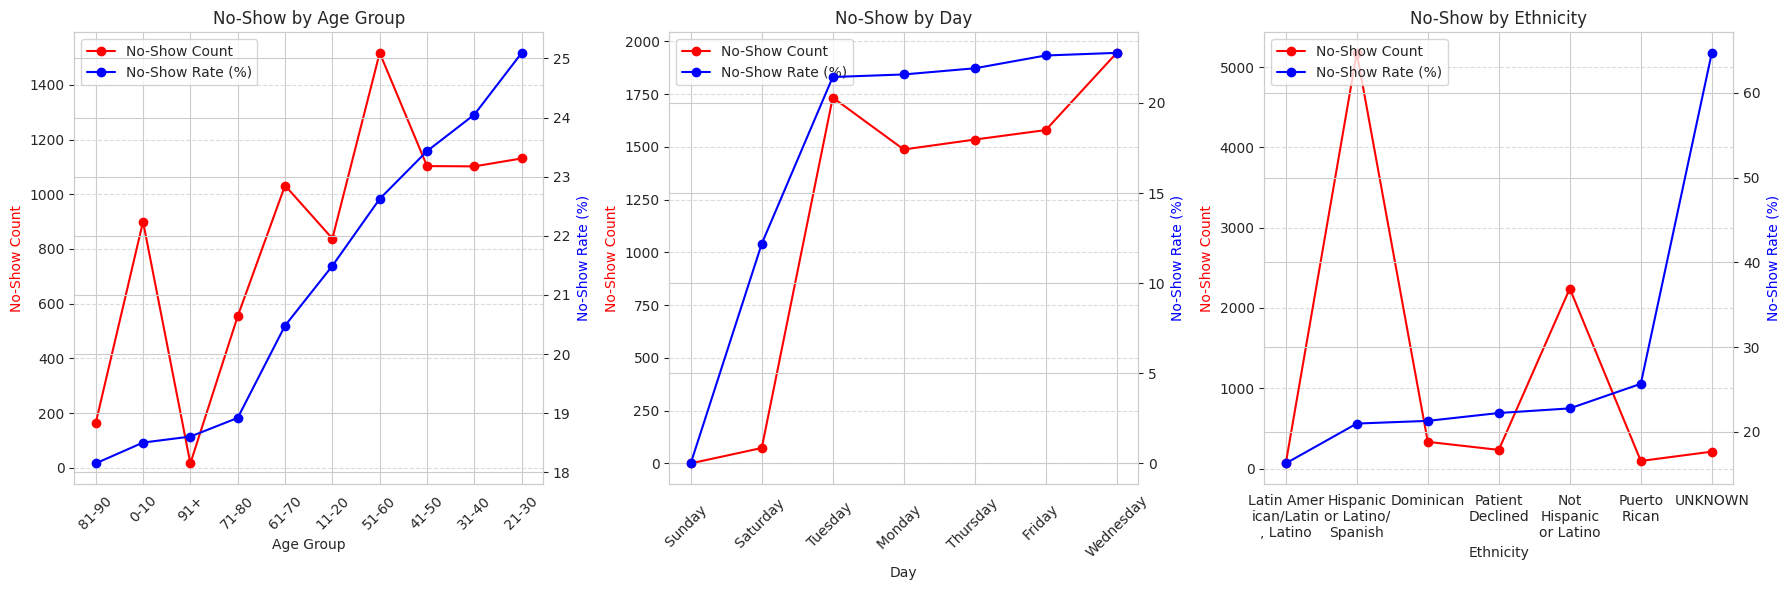

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Assuming filtered_df is your DataFrame with columns:
# 'patient.age', 'patient.noshow', 'apptday', 'ethnicity'

# Create age groups using pd.cut
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
filtered_df['age_group'] = pd.cut(filtered_df['patient.age'], bins=bins, labels=labels, right=False)

# -------------------------
# Compute no-show count and rate for Age Group
age_count = filtered_df.groupby('age_group')['patient.noshow'].sum()
age_rate  = filtered_df.groupby('age_group')['patient.noshow'].mean() * 100

# Sort by no-show rate (or count) to get smoother trend
order_age = age_rate.sort_values().index
age_count = age_count.loc[order_age]
age_rate = age_rate.loc[order_age]

# -------------------------
# Compute no-show count and rate for Day (using 'apptday')
day_count = filtered_df.groupby('apptday')['patient.noshow'].sum()
day_rate  = filtered_df.groupby('apptday')['patient.noshow'].mean() * 100

order_day = day_rate.sort_values().index
day_count = day_count.loc[order_day]
day_rate = day_rate.loc[order_day]

# -------------------------
# Compute no-show count and rate for Ethnicity
ethnicity_count = filtered_df.groupby('ethnicity')['patient.noshow'].sum()
ethnicity_rate  = filtered_df.groupby('ethnicity')['patient.noshow'].mean() * 100

order_ethnicity = ethnicity_rate.sort_values().index
ethnicity_count = ethnicity_count.loc[order_ethnicity]
ethnicity_rate = ethnicity_rate.loc[order_ethnicity]

# -------------------------
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ---------- Age Group Subplot ----------
ax1 = axs[0]
ax1_rate = ax1.twinx()  # Create a twin y-axis for rate

ax1.plot(age_count.index, age_count, marker='o', color='red', label='No-Show Count')
ax1_rate.plot(age_rate.index, age_rate, marker='o', color='blue', label='No-Show Rate (%)')

ax1.set_xlabel('Age Group')
ax1.set_ylabel('No-Show Count', color='red')
ax1_rate.set_ylabel('No-Show Rate (%)', color='blue')
ax1.set_title('No-Show by Age Group')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_rate.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# ---------- Day Subplot ----------
ax2 = axs[1]
ax2_rate = ax2.twinx()

ax2.plot(day_count.index, day_count, marker='o', color='red', label='No-Show Count')
ax2_rate.plot(day_rate.index, day_rate, marker='o', color='blue', label='No-Show Rate (%)')

ax2.set_xlabel('Day')
ax2.set_ylabel('No-Show Count', color='red')
ax2_rate.set_ylabel('No-Show Rate (%)', color='blue')
ax2.set_title('No-Show by Day')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_rate.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# ---------- Ethnicity Subplot ----------
ax3 = axs[2]
ax3_rate = ax3.twinx()

ax3.plot(ethnicity_count.index, ethnicity_count, marker='o', color='red', label='No-Show Count')
ax3_rate.plot(ethnicity_rate.index, ethnicity_rate, marker='o', color='blue', label='No-Show Rate (%)')

# If ethnicity labels are long, wrap them for readability
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in ethnicity_count.index]
ax3.set_xticks(range(len(ethnicity_count.index)))
ax3.set_xticklabels(wrapped_labels)

ax3.set_xlabel('Ethnicity')
ax3.set_ylabel('No-Show Count', color='red')
ax3_rate.set_ylabel('No-Show Rate (%)', color='blue')
ax3.set_title('No-Show by Ethnicity')
ax3.tick_params(axis='x', rotation=0)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_rate.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout for neatness and show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(len(filtered_df))

38215


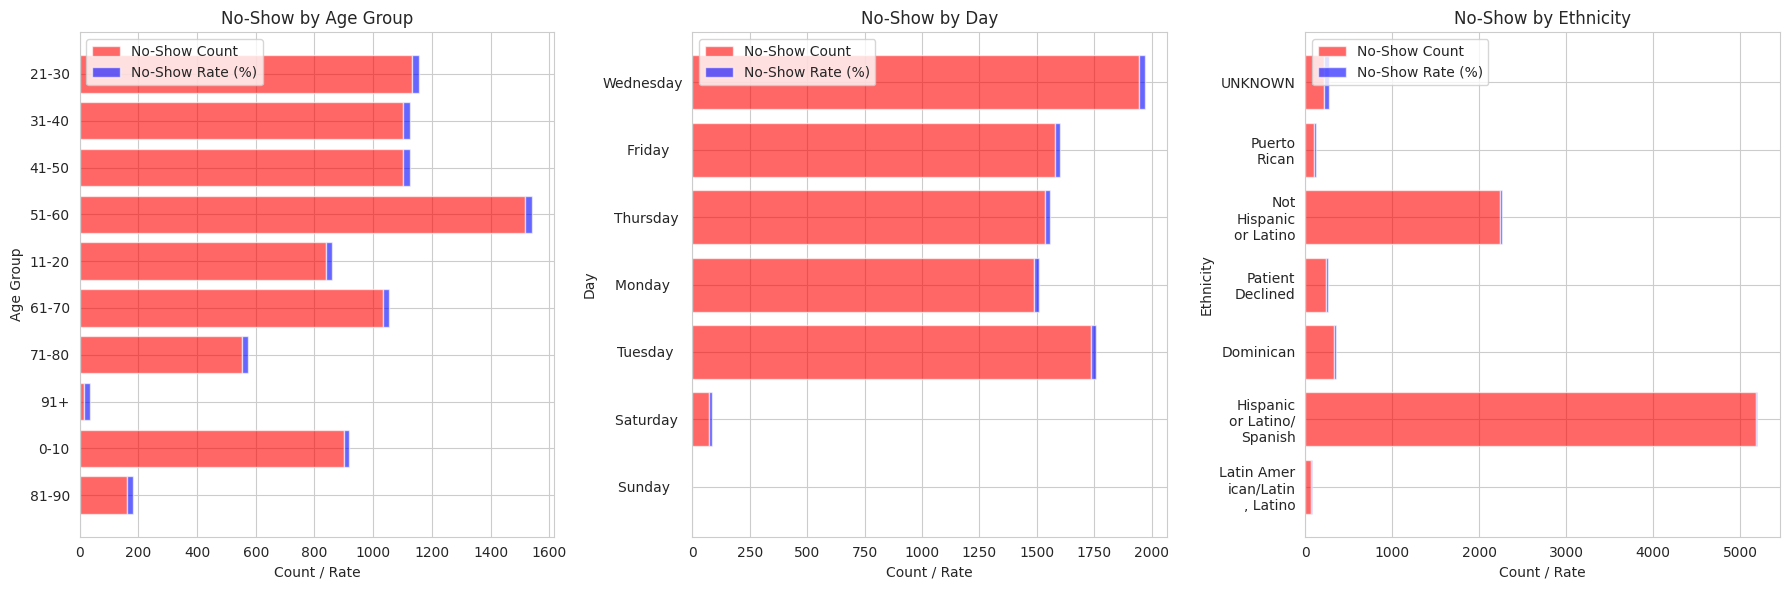

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Assuming filtered_df is your DataFrame with columns:
# 'patient.age', 'patient.noshow', 'apptday', 'ethnicity'

# Create age groups using pd.cut
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
filtered_df['age_group'] = pd.cut(filtered_df['patient.age'], bins=bins, labels=labels, right=False)

# -------------------------
# Compute no-show count and rate for Age Group
age_count = filtered_df.groupby('age_group')['patient.noshow'].sum()
age_rate  = filtered_df.groupby('age_group')['patient.noshow'].mean() * 100

# Sort by no-show rate (or count) to get smoother trend
order_age = age_rate.sort_values().index
age_count = age_count.loc[order_age]
age_rate = age_rate.loc[order_age]

# -------------------------
# Compute no-show count and rate for Day (using 'apptday')
day_count = filtered_df.groupby('apptday')['patient.noshow'].sum()
day_rate  = filtered_df.groupby('apptday')['patient.noshow'].mean() * 100

order_day = day_rate.sort_values().index
day_count = day_count.loc[order_day]
day_rate = day_rate.loc[order_day]

# -------------------------
# Compute no-show count and rate for Ethnicity
ethnicity_count = filtered_df.groupby('ethnicity')['patient.noshow'].sum()
ethnicity_rate  = filtered_df.groupby('ethnicity')['patient.noshow'].mean() * 100

order_ethnicity = ethnicity_rate.sort_values().index
ethnicity_count = ethnicity_count.loc[order_ethnicity]
ethnicity_rate = ethnicity_rate.loc[order_ethnicity]

# -------------------------
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ---------- Age Group Subplot ----------
ax1 = axs[0]
ax1.barh(age_count.index, age_count, color='red', label='No-Show Count', alpha=0.6)
ax1.barh(age_rate.index, age_rate, left=age_count, color='blue', label='No-Show Rate (%)', alpha=0.6)

ax1.set_xlabel('Count / Rate')
ax1.set_ylabel('Age Group')
ax1.set_title('No-Show by Age Group')
ax1.legend(loc='upper left')

# ---------- Day Subplot ----------
ax2 = axs[1]
ax2.barh(day_count.index, day_count, color='red', label='No-Show Count', alpha=0.6)
ax2.barh(day_rate.index, day_rate, left=day_count, color='blue', label='No-Show Rate (%)', alpha=0.6)

ax2.set_xlabel('Count / Rate')
ax2.set_ylabel('Day')
ax2.set_title('No-Show by Day')
ax2.legend(loc='upper left')

# ---------- Ethnicity Subplot ----------
ax3 = axs[2]
ax3.barh(ethnicity_count.index, ethnicity_count, color='red', label='No-Show Count', alpha=0.6)
ax3.barh(ethnicity_rate.index, ethnicity_rate, left=ethnicity_count, color='blue', label='No-Show Rate (%)', alpha=0.6)

# If ethnicity labels are long, wrap them for readability
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in ethnicity_count.index]
ax3.set_yticks(range(len(ethnicity_count.index)))
ax3.set_yticklabels(wrapped_labels)

ax3.set_xlabel('Count / Rate')
ax3.set_ylabel('Ethnicity')
ax3.set_title('No-Show by Ethnicity')
ax3.legend(loc='upper left')

# Adjust layout for neatness and show the plot
plt.tight_layout()
plt.show()


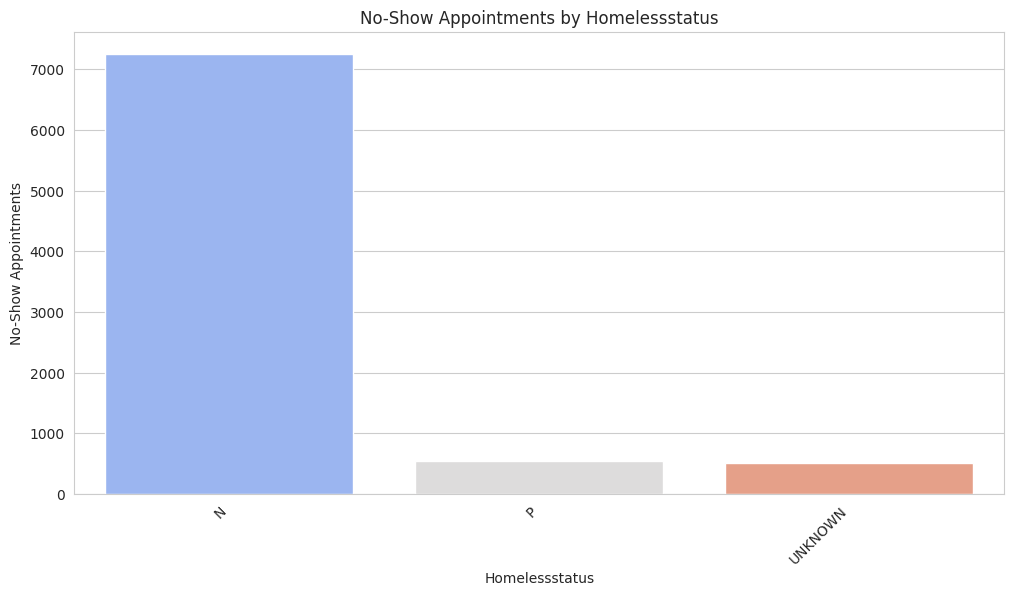

  homelessstatus  no_show_rate  total_appointments  no_show_appointments
0              N     86.811872               35127                  7254
1              P      6.462422                2154                   540
2        UNKNOWN      6.019627                 727                   503


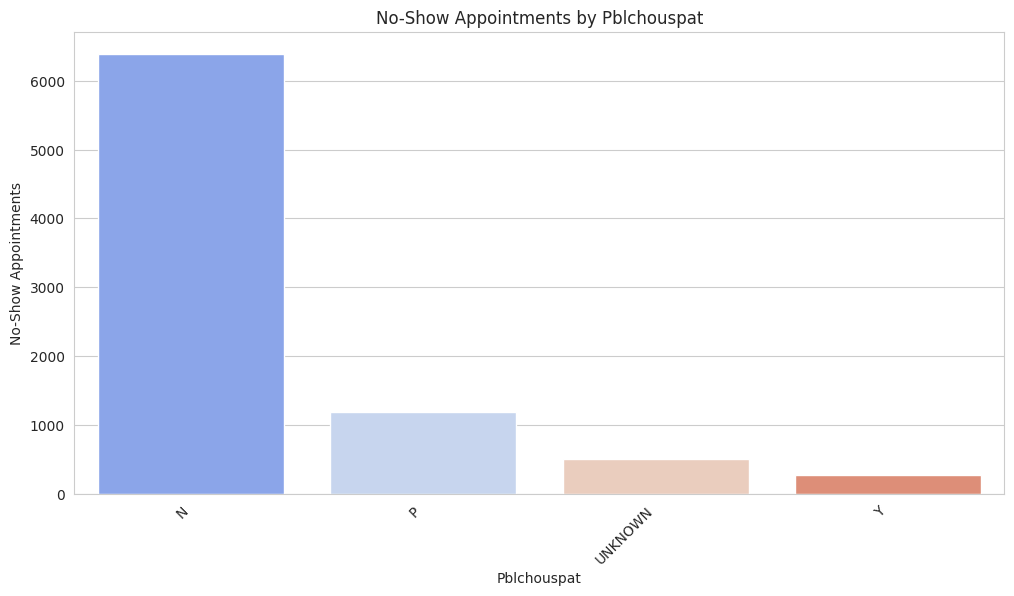

  pblchouspat  no_show_rate  total_appointments  no_show_appointments
0           N     76.471996               31038                  6390
1           P     14.217329                5012                  1188
2     UNKNOWN      6.031594                 731                   504
3           Y      3.279081                1434                   274


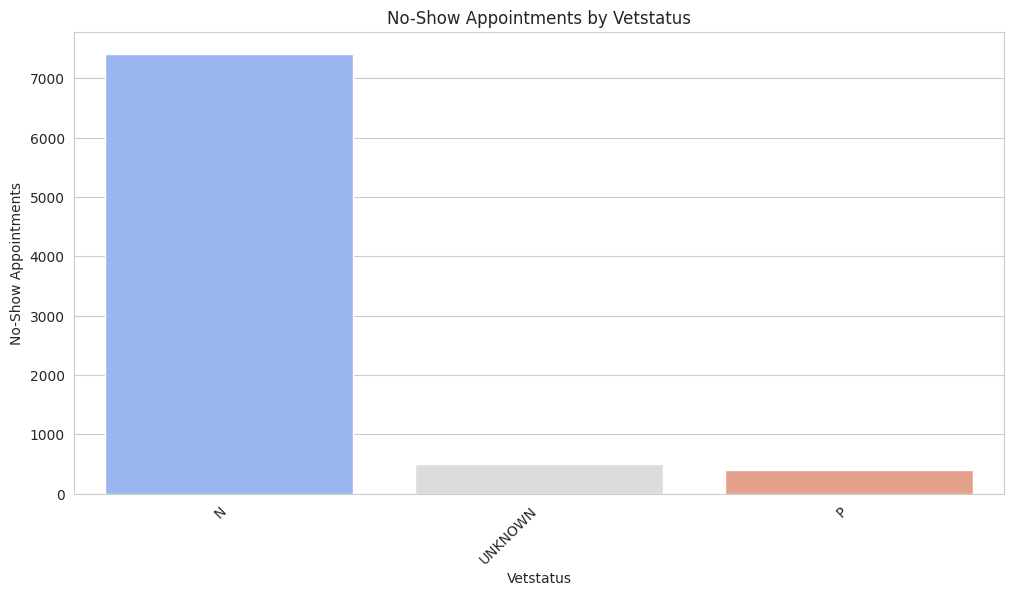

  vetstatus  no_show_rate  total_appointments  no_show_appointments
0         N     88.666826               35574                  7409
1   UNKNOWN      6.019627                 728                   503
2         P      4.894686                1791                   409


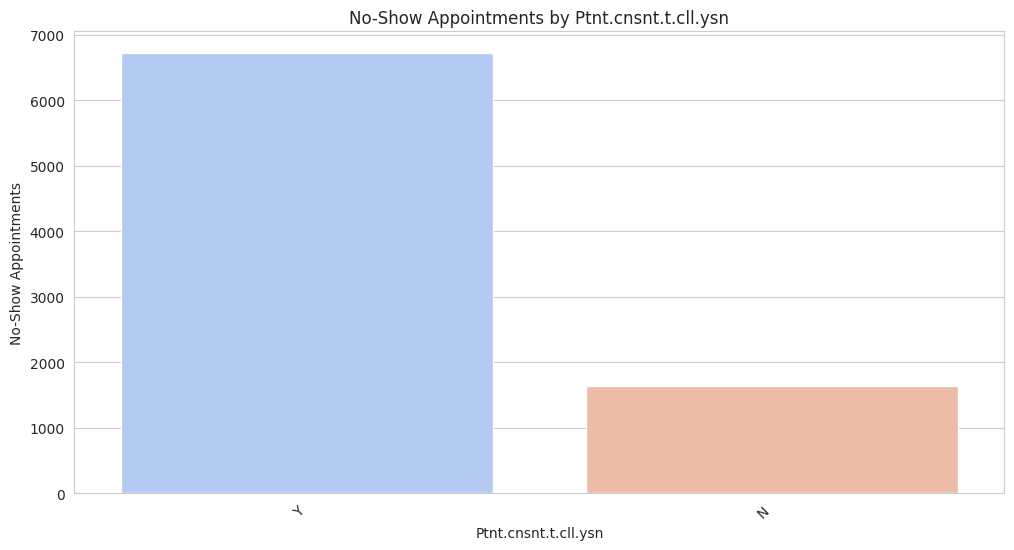

  ptnt.cnsnt.t.cll.ysn  no_show_rate  total_appointments  no_show_appointments
0                    Y     80.361417               32121                  6715
1                    N     19.638583                6094                  1641


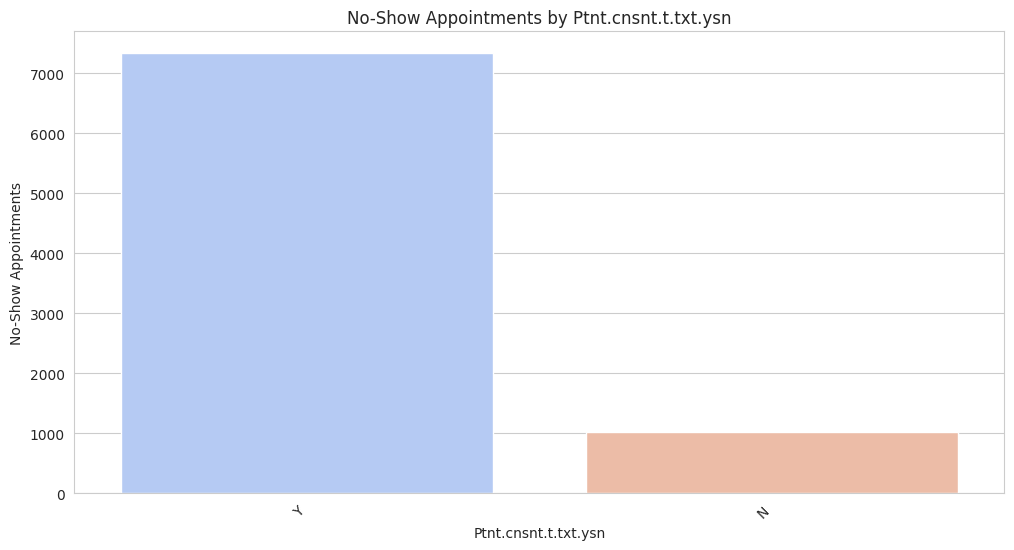

  ptnt.cnsnt.t.txt.ysn  no_show_rate  total_appointments  no_show_appointments
0                    Y     87.697463               34302                  7328
1                    N     12.302537                3913                  1028


In [ ]:
homeless_no_show = count_appointments_by_category(filtered_df, 'homelessstatus')
print(homeless_no_show)

pblchouspat_no_show = count_appointments_by_category(filtered_df, 'pblchouspat')
print(pblchouspat_no_show)

vetstatus_no_show = count_appointments_by_category(filtered_df, 'vetstatus')
print(vetstatus_no_show)

cnsnt_cll_no_show = count_appointments_by_category(filtered_df, 'ptnt.cnsnt.t.cll.ysn')
print(cnsnt_cll_no_show)

cnsnt_text_no_show = count_appointments_by_category(filtered_df, 'ptnt.cnsnt.t.txt.ysn')
print(cnsnt_text_no_show)

In [ ]:
# Calculate the no-show rate as percentages
no_show_rate_y = (6753 / 32399) * 100
no_show_rate_n = (1650 / 6211) * 100

# Display the results in a more readable format
print(f"Consent 'Y' No-show rate: {no_show_rate_y:.2f}%")
print(f"Consent 'N' No-show rate: {no_show_rate_n:.2f}%")


Consent 'Y' No-show rate: 20.84%
Consent 'N' No-show rate: 26.57%


Higher No-show Rate for "N" (No Consent): Patients who did not give consent (N) have a higher no-show rate compared to those who gave consent (Y). This suggests that giving consent might be related to a higher likelihood of attending appointments, or that consent may have other factors related to commitment.

In [ ]:
from scipy.stats import ttest_ind

# Extract the no-show rates for both groups
no_show_y = df[df['ptnt.cnsnt.t.cll.ysn'] == 'Y']['patient.noshow']
no_show_n = df[df['ptnt.cnsnt.t.cll.ysn'] == 'N']['patient.noshow']

# Perform a t-test
t_stat, p_value = ttest_ind(no_show_y, no_show_n)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -10.507697575418403, P-value: 8.626243692766937e-26


In [ ]:
# Calculate the correlation between 'cancelled.slots' and 'patient.noshow'
correlation = df['cancelled.slots'].corr(df['patient.noshow'])

# Display the correlation value
print(f'Correlation between Cancelled Slots and No-Show: {correlation}')


Correlation between Cancelled Slots and No-Show: 0.5976681371855566


cancelled.slots and patient.noshow:

A strong positive correlation (0.60) highlights that patients who cancel appointments are also more likely to exhibit no-show behavior.

Implications:
Behavioral Insights:

Patients who cancel frequently might require targeted reminders or follow-up mechanisms to reduce the likelihood of no-shows.
Operational Strategy:

For patients with many scheduled slots, proactive measures (e.g., flexible rescheduling options, automated reminders) might help reduce cancellations and no-shows.
Track high-cancel and high-no-show patients for pattern analysis.
Focus Area:

The strong relationship between cancelled.slots and patient.noshow suggests that addressing cancellations could significantly impact reducing no-shows.

# **Code to Analyze No-Show Characteristics:**

In [ ]:
# No-Show Percentage by Appointment Type
no_show_data = filtered_df[filtered_df['patient.noshow'] != 0]


appttype_no_show_percent = no_show_data.groupby('appttype')['patient.noshow'].count() / filtered_df.groupby('appttype')['patient.noshow'].count() * 100
print("No-Show Percentage by Appointment Type:")
print(appttype_no_show_percent)

# No-Show Percentage by Ethnicity
ethnicity_no_show_percent = no_show_data.groupby('ethnicity')['patient.noshow'].count() / filtered_df.groupby('ethnicity')['patient.noshow'].count() * 100
print("\nNo-Show Percentage by Ethnicity:")
print(ethnicity_no_show_percent)

# No-Show Percentage by Race
race_no_show_percent = no_show_data.groupby('race')['patient.noshow'].count() / filtered_df.groupby('race')['patient.noshow'].count() * 100
print("\nNo-Show Percentage by Race:")
print(race_no_show_percent)

# No-Show Percentage by Day of the Week
apptday_no_show_percent = no_show_data.groupby('apptday')['patient.noshow'].count() / filtered_df.groupby('apptday')['patient.noshow'].count() * 100
print("\nNo-Show Percentage by Day of the Week:")
print(apptday_no_show_percent)


No-Show Percentage by Appointment Type:
appttype
ALLERGY ADULT                 25.000000
ALLERGY CHILD                 43.925234
ANNUAL EXAM                   30.257511
ANNUAL GYN                    40.000000
ANNUAL GYN 15                 41.119221
BH FU/INITIAL LCSW            20.260067
BP check                       8.695652
EMG - Physiatry                     NaN
ESTABLISHED OB                14.583333
ESTABLISHED PATIENT 10        23.008850
ESTABLISHED PATIENT10         50.000000
FOLLOW UP 10                  17.307288
FOLLOW UP 15                  21.942060
FOLLOW UP 20                  25.792243
FOLLOW UP 30                  12.500000
FOLLOW UP 60                  17.391304
Follow-up Peds Resident       22.784810
GYN BIOPSY                    33.333333
HIV SCREENING                       NaN
INJECTION                      2.748092
INJECTION 15                   3.571429
IUD INSERTION                 50.000000
IUD REMOVAL                   33.333333
LAB WORK                       

In [ ]:
# Filter for patients who no-show
'''no_show_data = df[df['patient.noshow'] != 0]

# Group by different features and calculate percentage or counts
# Top Appointment Types for No-Shows
appttype_no_show = no_show_data['appttype'].value_counts(normalize=True) * 100
print("Top Appointment Types for No-Show (%):")
print(appttype_no_show)

# Top Ethnicities for No-Shows
ethnicity_no_show = no_show_data['ethnicity'].value_counts(normalize=True) * 100
print("\nTop Ethnicities for No-Show (%):")
print(ethnicity_no_show)

# Top Races for No-Shows
race_no_show = no_show_data['race'].value_counts(normalize=True) * 100
print("\nTop Races for No-Show (%):")
print(race_no_show)

# Day of the Week Analysis for No-Shows
apptday_no_show = no_show_data['apptday'].value_counts(normalize=True) * 100
print("\nNo-Show Percentage by Day of Week:")
print(apptday_no_show)

# Visualizations
# Appointment Types
plt.figure(figsize=(10, 6))
sns.barplot(x=appttype_no_show.index, y=appttype_no_show.values, palette='viridis')
plt.title("Top Appointment Types for No-Shows (%)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.xlabel("Appointment Type")
plt.tight_layout()
plt.show()

# Ethnicity
plt.figure(figsize=(8, 5))
sns.barplot(x=ethnicity_no_show.index, y=ethnicity_no_show.values, palette='magma')
plt.title("Top Ethnicities for No-Shows (%)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.xlabel("Ethnicity")
plt.tight_layout()
plt.show()

# Day of Week
plt.figure(figsize=(8, 5))
sns.barplot(x=apptday_no_show.index, y=apptday_no_show.values, palette='Set2')
plt.title("No-Show Percentage by Day of the Week")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.xlabel("Day of the Week")
plt.tight_layout()
plt.show()'''

'no_show_data = df[df[\'patient.noshow\'] != 0]\n\n# Group by different features and calculate percentage or counts\n# Top Appointment Types for No-Shows\nappttype_no_show = no_show_data[\'appttype\'].value_counts(normalize=True) * 100\nprint("Top Appointment Types for No-Show (%):")\nprint(appttype_no_show)\n\n# Top Ethnicities for No-Shows\nethnicity_no_show = no_show_data[\'ethnicity\'].value_counts(normalize=True) * 100\nprint("\nTop Ethnicities for No-Show (%):")\nprint(ethnicity_no_show)\n\n# Top Races for No-Shows\nrace_no_show = no_show_data[\'race\'].value_counts(normalize=True) * 100\nprint("\nTop Races for No-Show (%):")\nprint(race_no_show)\n\n# Day of the Week Analysis for No-Shows\napptday_no_show = no_show_data[\'apptday\'].value_counts(normalize=True) * 100\nprint("\nNo-Show Percentage by Day of Week:")\nprint(apptday_no_show)\n\n# Visualizations\n# Appointment Types\nplt.figure(figsize=(10, 6))\nsns.barplot(x=appttype_no_show.index, y=appttype_no_show.values, palette=\

In [ ]:
print(len(filtered_df))
filtered_df.head()

38215


,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
1,299758,2019-11-19,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
2,299770,2019-10-30,Wednesday,PT INITIAL EVAL,0,0,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
3,299770,2019-11-08,Friday,PT FOLLOW UP 30,1,1,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
4,299783,2019-10-11,Friday,FOLLOW UP 30,1,0,0,Black or AA,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N,41-50


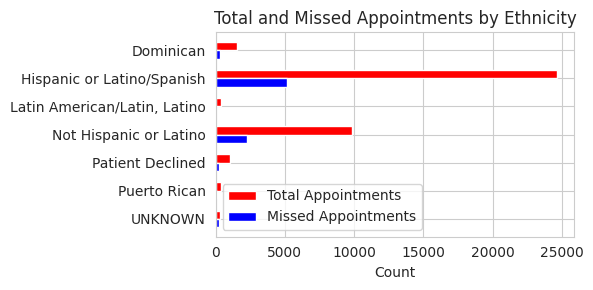

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df is your DataFrame
# Group by ethnicity and compute total appointments and missed (no-show) counts.
grouped = filtered_df.groupby('ethnicity')
total_counts = grouped.size()
noshow_counts = grouped['patient.noshow'].sum()

# Prepare the categories and the y-axis positions.
categories = total_counts.index
y_pos = np.arange(len(categories))
bar_height = 0.3  # Thickness of each bar

# Create the horizontal bar plot.
fig, ax = plt.subplots(figsize=(6, 3))

# Plot the count of total appointments (red bars)
ax.barh(y_pos - bar_height/2, total_counts, height=bar_height,
        color='red', label='Total Appointments')

# Plot the missed (no-show) appointments (blue bars)
ax.barh(y_pos + bar_height/2, noshow_counts, height=bar_height,
        color='blue', label='Missed Appointments')

# Customize the axes and add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Optional: Invert y-axis so the first category appears at the top
ax.set_xlabel('Count')
ax.set_title('Total and Missed Appointments by Ethnicity')
ax.legend()

plt.tight_layout()
plt.show()


Statistics for Patient.marital.status:
                        Total Appointments  Missed Appointments  \
patient.marital.status                                            
DIVORCED                               917                  171   
MARRIED                               6718                 1346   
PARTNER                                139                   26   
SEPARATED                              980                  220   
SINGLE                               26169                 5719   
UNKNOWN                               2482                  698   
WIDOWED                                810                  176   

                        No-Show Rate (%)  
patient.marital.status                    
DIVORCED                           18.65  
MARRIED                            20.04  
PARTNER                            18.71  
SEPARATED                          22.45  
SINGLE                             21.85  
UNKNOWN                            28.12  
WIDOWED      

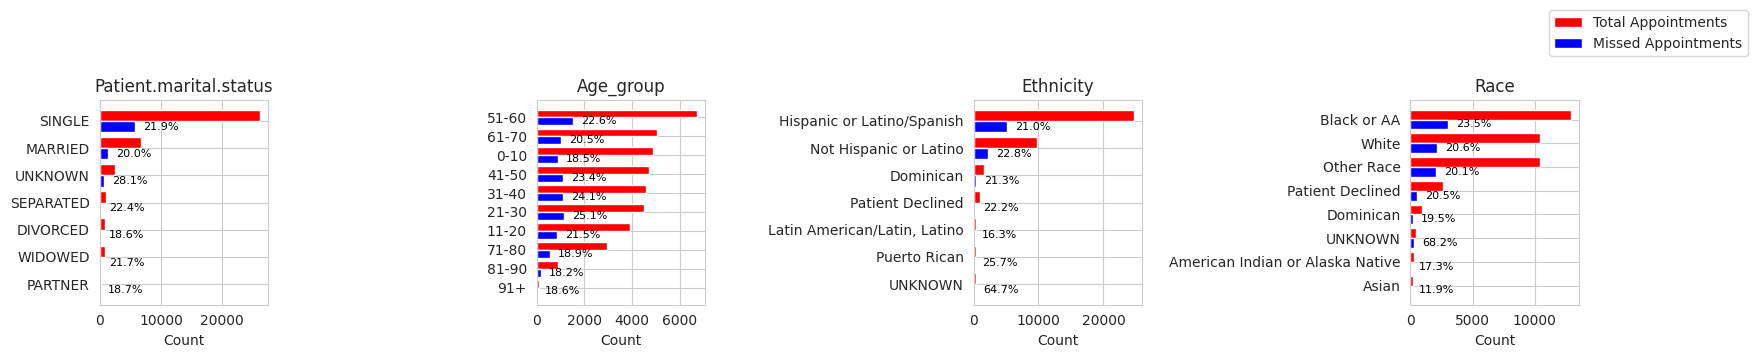

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_appointment_data_with_percentage(df, columns, figsize=(12, 4), bar_height=0.15, group_spacing=0.5):
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharex=False)

    if n == 1:
        axes = [axes]

    handles_labels = {}

    for i, col in enumerate(columns):
        # Group by the current column
        grouped = df.groupby(col)
        total_counts = grouped.size()
        noshow_counts = grouped['patient.noshow'].sum()
        no_show_rate = (noshow_counts / total_counts) * 100

        # Create a DataFrame to display the statistics
        stats_df = pd.DataFrame({
            'Total Appointments': total_counts,
            'Missed Appointments': noshow_counts,
            'No-Show Rate (%)': no_show_rate
        })
        stats_df['No-Show Rate (%)'] = stats_df['No-Show Rate (%)'].round(2)
        print(f"Statistics for {col.capitalize()}:\n{stats_df}\n")

        # Sort the categories by total counts
        sorted_categories = total_counts.sort_values(ascending=False)
        categories = sorted_categories.index
        y_pos = np.arange(len(categories)) * group_spacing

        ax = axes[i]
        bars_total = ax.barh(y_pos - bar_height/2, sorted_categories, height=bar_height,
                             color='red', label='Total Appointments')
        bars_noshow = ax.barh(y_pos + bar_height/2, noshow_counts[categories], height=bar_height,
                              color='blue', label='Missed Appointments')

        for bar, pct in zip(bars_noshow, no_show_rate[categories]):
            width = bar.get_width()
            x_position = width + 0.05 * max(total_counts)
            ax.text(x_position, bar.get_y() + bar.get_height()/2,
                    f'{pct:.1f}%', va='center', ha='left', fontsize=8, color='black', fontweight=500)

        ax.set_yticks(y_pos)
        ax.set_yticklabels(categories)
        ax.invert_yaxis()
        ax.set_xlabel('Count')
        ax.set_title(col.capitalize())

        for handle, label in zip(*ax.get_legend_handles_labels()):
            handles_labels[label] = handle

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Place legend outside the plot area
    fig.legend(handles_labels.values(), handles_labels.keys(), loc='lower right', bbox_to_anchor=(1.1, 1), ncol=1)

    plt.show()

# Example usage:
# Assuming 'filtered_df' is your DataFrame and contains the 'patient.noshow' column.
plot_appointment_data_with_percentage(filtered_df, ['patient.marital.status','age_group','ethnicity', 'race' ], figsize=(16, 3), bar_height=0.25, group_spacing=0.6)


In [ ]:
appt_type_mapping = {
    # Annual
    'ANNUAL EXAM': 'Annual',

    # Follow Up (includes Established Patient 10 variants and follow-up variants)
    'FOLLOW UP 15': 'Follow Up',
    'FOLLOW UP 30': 'Follow Up',
    'FOLLOW UP 20': 'Follow Up',
    'FOLLOW UP 10': 'Follow Up',
    'FOLLOW UP 60': 'Follow Up',
    'ESTABLISHED PATIENT 10': 'Follow Up',
    'ESTABLISHED PATIENT10': 'Follow Up',

    # GYN
    'ANNUAL GYN': 'GYN',
    'ANNUAL GYN 15': 'GYN',
    'ESTABLISHED OB': 'GYN',
    'GYN BIOPSY': 'GYN',
    'HIV SCREENING': 'GYN',
    'NEWBORN FIRST VISIT': 'GYN',
    'OB F/U 15': 'GYN',
    'OB INITIAL': 'GYN',
    'POST-PARTUM VISIT': 'GYN',
    'PREGNANCY TESTING': 'GYN',
    'IUD INSERTION': 'GYN',
    'IUD REMOVAL': 'GYN',

    # New Patient
    'NEW PATIENT 30': 'New Patient',
    'NEW PATIENT 15': 'New Patient',

    # OT
    'OT FOLLOW UP': 'OT',
    'OT INITIAL EVAL': 'OT',
    'OT RE-EVAL': 'OT',

    # Other
    'ALLERGY ADULT': 'Other',
    'INJECTION': 'Other',
    'INJECTION 15': 'Other',
    'LAB WORK': 'Other',
    'MOBILE HEALTH FAIR/EVENT': 'Other',
    'MOBILE HOMELESS SHELTERS': 'Other',
    'MOBILE SCHOOLS': 'Other',
    'PROCEDURE 30': 'Other',
    'SICK VISIT': 'Other',
    'SICK VISIT 15': 'Other',
    'VISION THERAPY': 'Other',
    'VISION THERAPY TRAINING': 'Other',
    'VISION THERAPY EVALUATION': 'Other',
    'BH FU/INITIAL LCSW': 'Other',
    'BP CHECK': 'Other',
    'MEDICATION MANAGEMENT': 'Other',
    'OPEN ACCESS': 'Other',
    'TRANSITION VISITS': 'Other',

    # Pediatrics
    'WELL CHILD EXAM 20': 'Pediatrics',
    'WELL CHILD EXAM 15': 'Pediatrics',
    'WELL CHILD EXAM 30': 'Pediatrics',
    'WELL CHILD PEDS RESIDENT': 'Pediatrics',
    'FOLLOW-UP PEDS RESIDENT': 'Pediatrics',
    'ALLERGY CHILD': 'Pediatrics',
    'OPEN ACCESS PEDS RESIDENTS': 'Pediatrics',

    # Psychiatry
    'PSYCHIATRY VISIT': 'Psychiatry',
    'PSYCHIATRY INITIAL CHILD': 'Psychiatry',

    # PT
    'PT INITIAL EVAL': 'PT',
    'PT FOLLOW UP 30': 'PT',
    'PT RE-EVALUATION': 'PT',
    'EMG - PHYSIATRY': 'PT',
    'PHYSIATRY - GENERAL': 'PT'
}

# Convert the appttype column to uppercase (and strip whitespace) for consistent mapping
filtered_df['appttype_clean'] = filtered_df['appttype'].str.strip().str.upper()

# Map the appointment types to the desired categories
filtered_df['Appointment Group'] = filtered_df['appttype_clean'].map(appt_type_mapping)

# Check the result
print(filtered_df[['appttype', 'Appointment Group']].head(20))

# Check the result
#print(filtered_df['appttype'].unique())

#print(filtered_df[['appttype', 'Appointment Group']].head())
print(filtered_df['Appointment Group'].unique())

            appttype Appointment Group
0       FOLLOW UP 15         Follow Up
1       FOLLOW UP 15         Follow Up
2    PT INITIAL EVAL                PT
3    PT FOLLOW UP 30                PT
4       FOLLOW UP 30         Follow Up
5       FOLLOW UP 20         Follow Up
6   PT RE-EVALUATION                PT
7    PT FOLLOW UP 30                PT
8    PT FOLLOW UP 30                PT
9    PT FOLLOW UP 30                PT
10   PT FOLLOW UP 30                PT
11   PT FOLLOW UP 30                PT
12   PT FOLLOW UP 30                PT
13      FOLLOW UP 15         Follow Up
14      FOLLOW UP 20         Follow Up
15      FOLLOW UP 20         Follow Up
16    NEW PATIENT 30       New Patient
17     SICK VISIT 15             Other
18      FOLLOW UP 10         Follow Up
19      FOLLOW UP 20         Follow Up
['Follow Up' 'PT' 'New Patient' 'Other' 'Pediatrics' 'GYN' 'Annual'
 'Psychiatry' 'OT']


Statistics for Appointment group:
                   Total Appointments  Missed Appointments  No-Show Rate (%)
Appointment Group                                                           
Annual                            932                  282             30.26
Follow Up                       14984                 3378             22.54
GYN                              2158                  483             22.38
New Patient                      2806                  947             33.75
OT                               2091                  424             20.28
Other                            6085                  664             10.91
PT                               6058                 1546             25.52
Pediatrics                       2485                  537             21.61
Psychiatry                        616                   95             15.42



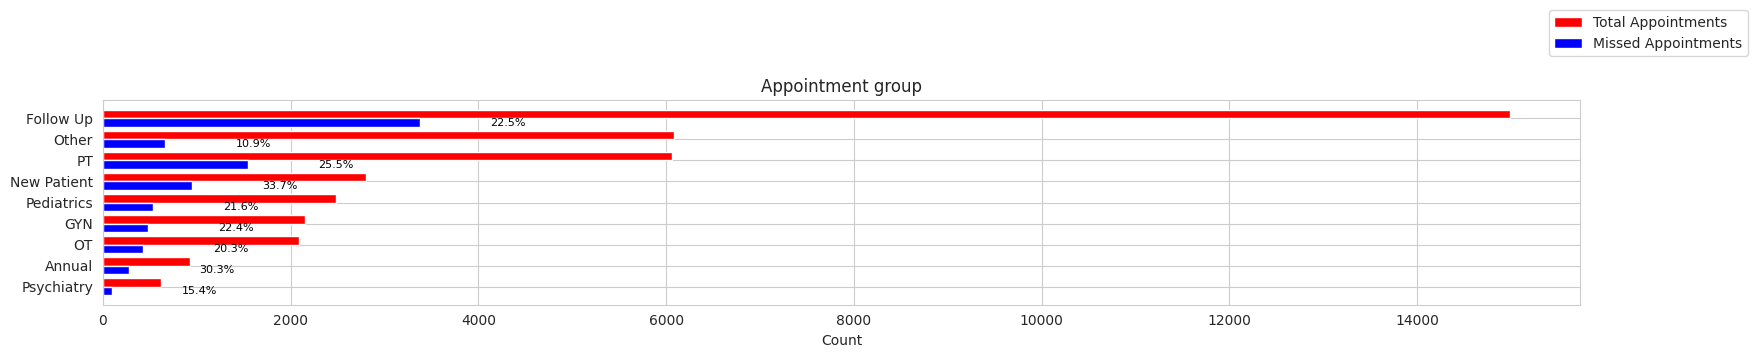

In [ ]:
filtered_df.head(2)
plot_appointment_data_with_percentage(filtered_df, ['Appointment Group' ], figsize=(16, 3), bar_height=0.25, group_spacing=0.6)


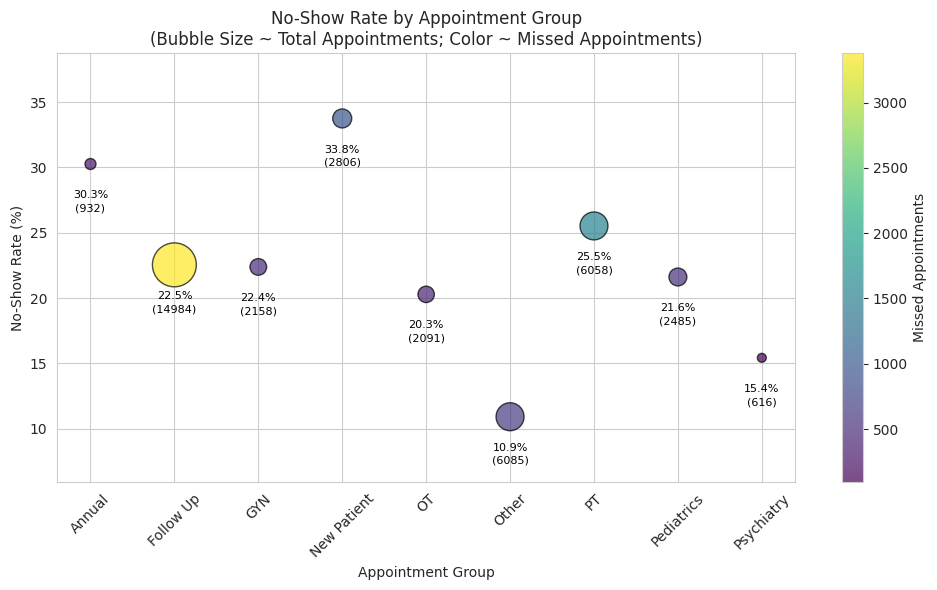

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Appointment Group': ['Annual', 'Follow Up', 'GYN', 'New Patient', 'OT', 'Other', 'PT', 'Pediatrics', 'Psychiatry'],
    'Total Appointments': [932, 14984, 2158, 2806, 2091, 6085, 6058, 2485, 616],
    'Missed Appointments': [282, 3378, 483, 947, 424, 664, 1546, 537, 95],
    'No-Show Rate (%)': [30.26, 22.54, 22.38, 33.75, 20.28, 10.91, 25.52, 21.61, 15.42]
}
df_groups = pd.DataFrame(data)

# Create numeric x positions for the categories
x = np.arange(len(df_groups))
y = df_groups['No-Show Rate (%)']

# Scale the bubble sizes (using total appointments) for visualization
bubble_sizes = (df_groups['Total Appointments'] / df_groups['Total Appointments'].max()) * 1000

# Use missed appointments as the color dimension
colors = df_groups['Missed Appointments']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=bubble_sizes, c=colors, cmap='viridis', alpha=0.7, edgecolor='k')

# Set offsets for annotation below each bubble
offset1 = 2.0   # offset for the no-show percentage below the bubble
offset2 = 3.0   # offset for the total appointments below the percentage

# Annotate each bubble: percentage and total appointments below the ball
for i, row in df_groups.iterrows():
    plt.text(
        x[i], y[i] - offset1,
        f'{row["No-Show Rate (%)"]:.1f}%',
        ha='center', va='top', fontsize=8, color='black'
    )
    plt.text(
        x[i], y[i] - offset2,
        f'({row["Total Appointments"]})',
        ha='center', va='top', fontsize=8, color='black'
    )

# Set category labels on the x-axis
plt.xticks(x, df_groups['Appointment Group'], rotation=45)
plt.xlabel('Appointment Group')
plt.ylabel('No-Show Rate (%)')
plt.title('No-Show Rate by Appointment Group\n(Bubble Size ~ Total Appointments; Color ~ Missed Appointments)')

# Adjust the y-axis limits to add space below the bubbles for annotations.
# Extend the bottom of the y-axis below the lowest bubble minus the larger offset.
plt.ylim(min(y) - offset2 - 2, max(y) + 5)

# Add a colorbar to show the scale of missed appointments
cbar = plt.colorbar(scatter)
cbar.set_label('Missed Appointments')

plt.tight_layout()
plt.show()


**PREDICTIVE ANALYSIS Section 3**

MACHINE LEARNING ALGORITHMS

In [ ]:
df_encoded = df
df_encoded.head()

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
1,299758,2019-11-19,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
2,299770,2019-10-30,Wednesday,PT INITIAL EVAL,0,0,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
3,299770,2019-11-08,Friday,PT FOLLOW UP 30,1,1,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
4,299783,2019-10-11,Friday,FOLLOW UP 30,1,0,0,Black or AA,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N,41-50


In [ ]:
# Convert the '2' values to '0' (or '1') if needed
df_encoded[target_column] = df_encoded[target_column].replace(2, 1)  # This combines '2' with '1'

# Now the target column is binary: 0 (showed up) and 1 (no-show)
# Check unique values in the target column
unique_values = df_encoded[target_column].unique()
print(unique_values)  # Should output [0, 1]


[0 1]


In [ ]:
df_encoded.head()

,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group
0,299758,2019-10-22,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
1,299758,2019-11-19,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y,51-60
2,299770,2019-10-30,Wednesday,PT INITIAL EVAL,0,0,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
3,299770,2019-11-08,Friday,PT FOLLOW UP 30,1,1,0,Black or AA,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y,81-90
4,299783,2019-10-11,Friday,FOLLOW UP 30,1,0,0,Black or AA,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N,41-50


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
df_try1.isnull().sum()  # Check for any missing values

,0
apptday,0
appttype,0
scheduled.slots,0
cancelled.slots,0
patient.noshow,0
race,0
ethnicity,0
patient.lang,0
patientsex,0
patient.marital.status,0


In [ ]:
df_try1 = df.copy()
print(type(df_try1))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Drop irrelevant columns

df_try1.drop(['patientid', 'patient.age'], axis=1, inplace=True)
print(type(df_try1))  # Should print <class 'pandas.core.frame.DataFrame'>
df_try1.drop(['apptdate'], axis=1, inplace=True)

# Handle missing values (drop or fill with mode)
#df_try1.dropna(inplace=True)
# Convert weekday names to numbers (Monday=0, ..., Sunday=6)
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df_try1['apptday'] = df_try1['apptday'].str.strip().map(weekday_mapping)
# Convert categorical features into numeric using Label Encoding & One-Hot Encoding
categorical_columns = ['appttype', 'race', 'ethnicity', 'patient.lang',
                        'patientsex', 'patient.marital.status', 'homelessstatus',
                        'pblchouspat', 'vetstatus', 'age_group']

for col in categorical_columns:
    print(col)
    df_try1[col] = LabelEncoder().fit_transform(df_try1[col])

# Convert binary categorical columns (Y/N) to 1/0
binary_columns = ['ptnt.cnsnt.t.cll.ysn', 'ptnt.cnsnt.t.txt.ysn']

for col in binary_columns:
    print(col)
    df_try1[col] = df_try1[col].map({'Y': 1, 'N': 0})

# Define features (X) and target variable (y)
X = df_try1.drop("patient.noshow", axis=1)  # Predicting whether the patient will no-show
y = df_try1["patient.noshow"]
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Machine Learning Model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



<class 'pandas.core.frame.DataFrame'>
appttype
race
ethnicity
patient.lang
patientsex
patient.marital.status
homelessstatus
pblchouspat
vetstatus
age_group
ptnt.cnsnt.t.cll.ysn
ptnt.cnsnt.t.txt.ysn
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6042
           1       0.59      0.59      0.59      1680

    accuracy                           0.82      7722
   macro avg       0.74      0.74      0.74      7722
weighted avg       0.82      0.82      0.82      7722



In [ ]:
def randome_forest_model(X_train, X_test,y_train, y_test, n_est=100,depth=None):# Feature Scaling
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Train a Machine Learning Model (Random Forest Classifier)
  model = RandomForestClassifier(n_estimators=n_est, random_state=42, max_depth=depth)
  model.fit(X_train, y_train)

  # Predictions
  y_pred = model.predict(X_test)

  # Model Evaluation
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

**RANDOm FOREST DEFAUL**

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randome_forest_model(X_train, X_test,y_train, y_test)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6042
           1       0.59      0.59      0.59      1680

    accuracy                           0.82      7722
   macro avg       0.74      0.74      0.74      7722
weighted avg       0.82      0.82      0.82      7722

Confusion Matrix:
[[5351  691]
 [ 695  985]]


In [ ]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
randome_forest_model(X_train, X_test,y_train, y_test)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4884
           1       0.84      0.94      0.89      4765

    accuracy                           0.88      9649
   macro avg       0.88      0.88      0.88      9649
weighted avg       0.89      0.88      0.88      9649

Confusion Matrix:
[[4021  863]
 [ 295 4470]]


In [ ]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of testing samples: {X_test.shape[0]}')

Number of training samples: 48260
Number of testing samples: 12066


In [ ]:
'''
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)'''
#print(grid_search.best_params_)

#print("Best score:", grid_search.best_score_)
randome_forest_model(X_train, X_test,y_train, y_test, 100, 50)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4884
           1       0.84      0.94      0.89      4765

    accuracy                           0.88      9649
   macro avg       0.88      0.88      0.88      9649
weighted avg       0.89      0.88      0.88      9649

Confusion Matrix:
[[4021  863]
 [ 295 4470]]


In [ ]:
df_try1.head()

,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group
0,1,12,1,1,0,12,4,6,0,4,0,0,0,1,1,5
1,1,12,1,0,0,12,4,6,0,4,0,0,0,1,1,5
2,2,45,0,0,0,4,8,6,1,4,0,0,0,0,1,8
3,4,44,1,1,0,4,8,6,1,4,0,0,0,0,1,8
4,4,14,1,0,0,4,8,6,0,4,1,1,1,1,0,4


**DROP FEATURE ONE BY ONE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Random Forest model function
def randome_forest_model(X_train, X_test, y_train, y_test, n_est=100, depth=None):
    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Random Forest model
    model = RandomForestClassifier(n_estimators=n_est, random_state=42, max_depth=depth)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

# Iterate through all columns except the target column (patient.noshow)
'''columns_to_drop = ["apptday", "appttype", "race", "ethnicity", "scheduled.slots", "cancelled.slots",
                   "patient.lang", "patientsex", "patient.marital.status", "homelessstatus",
                   "pblchouspat", "vetstatus", "ptnt.cnsnt.t.cll.ysn", "ptnt.cnsnt.t.txt.ysn",
                   "age_group"]'''
columns_to_drop = ["apptday", "appttype", "race", "ethnicity", "scheduled.slots",
                   "patient.lang", "patientsex", "patient.marital.status", "homelessstatus",
                   "pblchouspat", "vetstatus", "ptnt.cnsnt.t.cll.ysn", "ptnt.cnsnt.t.txt.ysn",
                   "age_group"]
# Drop one column at a time, build X and y, and train the model
#for col in columns_to_drop:
    #print(f"\nRunning model with column '{col}' dropped:")

# Drop the current column from the dataframe and define X and y
X = df_try1.drop(['cancelled.slots', "patient.noshow"], axis=1)  # Drop the current column and target column
y = df_try1["patient.noshow"]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Call the Random Forest model
randome_forest_model(X_train, X_test, y_train, y_test)

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      6052
           1       0.74      0.81      0.78      6014

    accuracy                           0.77     12066
   macro avg       0.77      0.77      0.77     12066
weighted avg       0.77      0.77      0.77     12066

Confusion Matrix:
[[4366 1686]
 [1127 4887]]


**XGBOOST**

In [ ]:


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      4884
           1       0.81      0.98      0.88      4765

    accuracy                           0.87      9649
   macro avg       0.89      0.87      0.87      9649
weighted avg       0.89      0.87      0.87      9649

Confusion Matrix:
[[3775 1109]
 [ 111 4654]]


**DEEP LEARNING CLASSIFICATION TECHNIQUES**

**EPOCHS = 10, BATCHO SIZE =32**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim))  # First hidden layer
    model.add(Dense(units=32, activation='relu'))  # Second hidden layer
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = build_ann_model(X_train.shape[1])

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions with the ANN model
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Epoch 1/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7303 - loss: 0.5465 - val_accuracy: 0.8616 - val_loss: 0.3417
Epoch 2/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8627 - loss: 0.3425 - val_accuracy: 0.8641 - val_loss: 0.3403
Epoch 3/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8650 - loss: 0.3338 - val_accuracy: 0.8638 - val_loss: 0.3246
Epoch 4/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8643 - loss: 0.3288 - val_accuracy: 0.8641 - val_loss: 0.3632
Epoch 5/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8643 - loss: 0.3283 - val_accuracy: 0.8638 - val_loss: 0.3264
Epoch 6/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8683 - loss: 0.3177 - val_accuracy: 0.8645 - val_loss: 0.3222
Epoch 7/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8662 - loss: 0.3211 - val_accuracy: 0.8637 - val_loss: 0.3223
Epoch 8/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8680 - loss: 0.3189

***DROPOUT and Regularization***

**EPOCHS = 50, Batch size same as before**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Learning rate scheduler function
def lr_scheduler(epoch):
    initial_lr = 0.001
    lr = initial_lr * (0.9 ** epoch)  # Reduce learning rate by 10% every epoch
    return lr

# Updated ANN model with Dropout and L2 regularization
def build_ann_model_with_regularization(input_dim):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)))  # L2 Regularization
    model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the ANN model with regularization
ann_model = build_ann_model_with_regularization(X_train.shape[1])

# Use Learning Rate Scheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler_callback], verbose=1)

# Predictions with the updated ANN model
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5449 - loss: 1.0176 - val_accuracy: 0.8639 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 2/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8543 - loss: 0.4146 - val_accuracy: 0.8639 - val_loss: 0.3694 - learning_rate: 9.0000e-04
Epoch 3/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8642 - loss: 0.3769 - val_accuracy: 0.8638 - val_loss: 0.3575 - learning_rate: 8.1000e-04
Epoch 4/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8666 - loss: 0.3598 - val_accuracy: 0.8639 - val_loss: 0.3494 - learning_rate: 7.2900e-04
Epoch 5/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8629 - loss: 0.3549 - val_accuracy: 0.8638 - val_loss: 0.3440 - learning_rate: 6.5610e-04
Epoch 6/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8666 - loss: 0.3447 - val_accuracy: 0.8638 - val_loss: 0.3427 - learning_rate: 5.9049e-04
Epoch 7/50
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step -

In [ ]:
# Predictions with the updated ANN model
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:


# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, and y_test
# You can call the function like this:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_model(X_train, X_test, y_train, y_test, depth=None, min_samples_split=2, min_samples_leaf=1):
    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Machine Learning Model (Decision Tree Classifier)
    model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

decision_tree_model(X_train, X_test, y_train, y_test, depth=10, min_samples_split=2, min_samples_leaf=1)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      4884
           1       0.79      0.98      0.88      4765

    accuracy                           0.86      9649
   macro avg       0.88      0.87      0.86      9649
weighted avg       0.88      0.86      0.86      9649

Confusion Matrix:
[[3677 1207]
 [ 102 4663]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def linear_regression_model(X_train, X_test, y_train, y_test):
    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    # Optionally, you can print the coefficients and intercept
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    return model

lr_model = linear_regression_model(X_train, X_test, y_train, y_test)


In [ ]:
# Predictions with the updated LR model
y_pred = (lr_model.predict(X_test) > 0.5).astype("int32")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for apptday
label_encoder = LabelEncoder()
df_encoded['appt_is_weekend'] = df['apptday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

df_encoded = pd.get_dummies(df, columns=['apptday'], drop_first=True)

In [ ]:
df_encoded.head()

In [ ]:
category_onehotencoded = ['patient.lang', 'patientsex', 'patient.marital.status', 'homelessstatus','ptnt.cnsnt.t.cll.ysn'	,'ptnt.cnsnt.t.txt.ysn','pblchouspat','vetstatus']
df[category_onehotencoded] = df[category_onehotencoded].astype(str)

# Convert boolean columns to 0 and 1
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
df = pd.get_dummies(df, columns=category_onehotencoded, drop_first=True)


In [ ]:
df = df.drop(columns=['patient.age', 'apptdate', ])

In [ ]:
df.head()